In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer

In [2]:
# Charger les données d'origine à partir du fichier CSV avec encodage UTF-8 et séparateur de tabulation
data = pd.read_csv('dataframe.csv', sep='\t', encoding='utf-8')

# Afficher les premières lignes des données pour vérifier le chargement correct
print(data.head())

C:\Users\black\AppData\Local\Temp\ipykernel_9944\4035649410.py:2: DtypeWarning: Columns (0,3,5,19,20,24,25,26,27,28,35,36,37,38,39,48) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('dataframe.csv', sep='\t', encoding='utf-8')


    code                                                url  \
0   3087  http://world-fr.openfoodfacts.org/produit/0000...   
1   4530  http://world-fr.openfoodfacts.org/produit/0000...   
2   4559  http://world-fr.openfoodfacts.org/produit/0000...   
3  16087  http://world-fr.openfoodfacts.org/produit/0000...   
4  16094  http://world-fr.openfoodfacts.org/produit/0000...   

                      creator   created_t      created_datetime  \
0  openfoodfacts-contributors  1474103866  2016-09-17T09:17:46Z   
1             usda-ndb-import  1489069957  2017-03-09T14:32:37Z   
2             usda-ndb-import  1489069957  2017-03-09T14:32:37Z   
3             usda-ndb-import  1489055731  2017-03-09T10:35:31Z   
4             usda-ndb-import  1489055653  2017-03-09T10:34:13Z   

  last_modified_t last_modified_datetime                    product_name  \
0      1474103893   2016-09-17T09:18:13Z              Farine de blé noir   
1      1489069957   2017-03-09T14:32:37Z  Banana Chips Sweetened (

In [3]:
# Obtenir et afficher le nombre de lignes et de colonnes dans le dataframe
dim = data.shape
print("Nombre de lignes dans le data frame :", dim[0])
print("Nombre de colonnes dans le data frame :", dim[1])

Nombre de lignes dans le data frame : 320772
Nombre de colonnes dans le data frame : 162


In [4]:
# Fournir un résumé statistique des colonnes sélectionnées dans le dataframe
data.describe()

,no_nutriments,additives_n,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,nutrition_grade_uk,energy_100g,energy-from-fat_100g,fat_100g,...,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
count,0.0,248939.000000,248939.000000,0.0,248939.000000,0.0,0.0,2.611130e+05,857.000000,243891.000000,...,49.000000,3036.000000,165.000000,948.000000,0.0,268.000000,221210.000000,221210.000000,0.0,0.0
mean,NaN,1.936024,0.019659,NaN,0.055246,NaN,NaN,1.141915e+03,585.501214,12.730379,...,6.425698,31.458587,15.412121,49.547785,NaN,341.700764,9.165535,9.058049,NaN,NaN
std,NaN,2.502019,0.140524,NaN,0.269207,NaN,NaN,6.447154e+03,712.809943,17.578747,...,2.047841,31.967918,3.753028,18.757932,NaN,425.211439,9.055903,9.183589,NaN,NaN
min,NaN,0.000000,0.000000,NaN,0.000000,NaN,NaN,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,8.000000,6.000000,NaN,0.000000,-15.000000,-15.000000,NaN,NaN
25%,NaN,0.000000,0.000000,NaN,0.000000,NaN,NaN,3.770000e+02,49.400000,0.000000,...,6.300000,0.000000,12.000000,32.000000,NaN,98.750000,1.000000,1.000000,NaN,NaN
50%,NaN,1.000000,0.000000,NaN,0.000000,NaN,NaN,1.100000e+03,300.000000,5.000000,...,7.200000,23.000000,15.000000,50.000000,NaN,195.750000,10.000000,9.000000,NaN,NaN
75%,NaN,3.000000,0.000000,NaN,0.000000,NaN,NaN,1.674000e+03,898.000000,20.000000,...,7.400000,51.000000,15.000000,64.250000,NaN,383.200000,16.000000,16.000000,NaN,NaN
max,NaN,31.000000,2.000000,NaN,6.000000,NaN,NaN,3.251373e+06,3830.000000,714.290000,...,8.400000,100.000000,25.000000,100.000000,NaN,2842.000000,40.000000,40.000000,NaN,NaN


In [5]:
# Identifier et afficher la liste des colonnes présentes dans le dataframe
columns_list = data.columns.tolist()
print(columns_list)

['code', 'url', 'creator', 'created_t', 'created_datetime', 'last_modified_t', 'last_modified_datetime', 'product_name', 'generic_name', 'quantity', 'packaging', 'packaging_tags', 'brands', 'brands_tags', 'categories', 'categories_tags', 'categories_fr', 'origins', 'origins_tags', 'manufacturing_places', 'manufacturing_places_tags', 'labels', 'labels_tags', 'labels_fr', 'emb_codes', 'emb_codes_tags', 'first_packaging_code_geo', 'cities', 'cities_tags', 'purchase_places', 'stores', 'countries', 'countries_tags', 'countries_fr', 'ingredients_text', 'allergens', 'allergens_fr', 'traces', 'traces_tags', 'traces_fr', 'serving_size', 'no_nutriments', 'additives_n', 'additives', 'additives_tags', 'additives_fr', 'ingredients_from_palm_oil_n', 'ingredients_from_palm_oil', 'ingredients_from_palm_oil_tags', 'ingredients_that_may_be_from_palm_oil_n', 'ingredients_that_may_be_from_palm_oil', 'ingredients_that_may_be_from_palm_oil_tags', 'nutrition_grade_uk', 'nutrition_grade_fr', 'pnns_groups_1', 

In [6]:
# Calculer le pourcentage de valeurs manquantes dans 'categories'
missing_percentage = data['categories'].isnull().mean() * 100

# Afficher le pourcentage de valeurs manquantes
print(f"Pourcentage de valeurs manquantes dans 'categories': {missing_percentage:.2f}%")

Pourcentage de valeurs manquantes dans 'categories': 73.69%


In [7]:
# Fonction de synchronisation
def synchronize_X_y(X, y):
    # Réinitialiser les index des deux DataFrames
    X = X.reset_index(drop=True)
    y = y.reset_index(drop=True)
    
    # Synchroniser les index
    common_indices = X.index.intersection(y.index)
    X = X.loc[common_indices]
    y = y.loc[common_indices]
    
    # Vérifier les dimensions pour s'assurer qu'ils sont synchronisés
    print(f"Dimensions de X synchronisé : {X.shape}")
    print(f"Dimensions de y synchronisé : {y.shape}")
    
    return X, y

In [8]:
def preprocess_data(df):
    # 1. Filtrer les produits français uniquement
    df = df[df['countries_fr'].str.contains('France', na=False)]
    
    # 2. Supprimer les lignes avec des valeurs manquantes dans 'categories'
    df = df.dropna(subset=['categories'])

    # 3. Supprimer les doublons basés sur le code barre
    df = df.drop_duplicates(subset=['code'])
    
    # 4. Séparer la colonne cible 'categories' du reste du dataset
    X = df.drop(columns=['categories'])
    y = df[['categories']]
    
    # 5. Sélectionner les features pertinentes pour l'analyse
    selected_features = [
        'energy_100g', 'fat_100g', 'saturated-fat_100g',
        'carbohydrates_100g', 'sugars_100g', 'proteins_100g',
        'salt_100g', 'sodium_100g', 'fiber_100g', 'brands', 'pnns_groups_1',
        'pnns_groups_2'
    ]
    
    X_selected = X[selected_features]
    
    # 6. Supprimer les produits en double pour éviter les biais dans l'analyse
    X_selected = X_selected.drop_duplicates()

    # 7. Appeler la fonction pour synchroniser X et y
    X_selected, y = synchronize_X_y(X_selected, y)
    
    # 8. Vérifier les dimensions et les taux de remplissage des features sélectionnées
    print("Dimensions du dataframe après suppression des doublons :", X_selected.shape)
    filling_rate_selected_after = (X_selected.notnull().mean() * 100).round(2)
    print("Taux de remplissage des features sélectionnées :")
    print(filling_rate_selected_after)
    
    return X_selected, y

In [9]:
# Appliquer la fonction de prétraitement
X_processed, y_processed = preprocess_data(data)

Dimensions de X synchronisé : (53181, 12)
Dimensions de y synchronisé : (53181, 1)
Dimensions du dataframe après suppression des doublons : (53181, 12)
Taux de remplissage des features sélectionnées :
energy_100g            84.38
fat_100g               79.54
saturated-fat_100g     80.52
carbohydrates_100g     78.87
sugars_100g            80.71
proteins_100g          83.90
salt_100g              80.85
sodium_100g            80.85
fiber_100g             53.05
brands                 99.67
pnns_groups_1          97.26
pnns_groups_2         100.00
dtype: float64


In [10]:
# Fonction de validation des données nutritionnelles avec exclusion explicite des NaN
def validate_nutrient_data(X, y):
    # Vérifier que 'saturated-fat_100g' est inférieur ou égal à 'fat_100g'
    saturated_fat_check = X['saturated-fat_100g'] <= X['fat_100g']
    saturated_fat_check = saturated_fat_check | X['saturated-fat_100g'].isna() | X['fat_100g'].isna()
    if not saturated_fat_check.all():
        print(f"Erreur: Il y a {(~saturated_fat_check).sum()} lignes où 'saturated-fat_100g' > 'fat_100g'")
        print(X[~saturated_fat_check][['saturated-fat_100g', 'fat_100g']].head())
    else:
        print("Aucune ligne où 'saturated-fat_100g' est supérieur à 'fat_100g' trouvée")

    # Vérifier que 'sugars_100g' est inférieur ou égal à 'carbohydrates_100g'
    sugars_check = X['sugars_100g'] <= X['carbohydrates_100g']
    sugars_check = sugars_check | X['sugars_100g'].isna() | X['carbohydrates_100g'].isna()
    if not sugars_check.all():
        print(f"Erreur: Il y a {(~sugars_check).sum()} lignes où 'sugars_100g' > 'carbohydrates_100g'")
        print(X[~sugars_check][['sugars_100g', 'carbohydrates_100g']].head())
    else:
        print("Aucune ligne où 'sugars_100g' est supérieur à 'carbohydrates_100g' trouvée")
    
    # Vérifier que 'sodium_100g' est inférieur ou égal à 'salt_100g'
    sodium_check = X['sodium_100g'] <= X['salt_100g']
    sodium_check = sodium_check | X['sodium_100g'].isna() | X['salt_100g'].isna()
    if not sodium_check.all():
        print(f"Erreur: Il y a {(~sodium_check).sum()} lignes où 'sodium_100g' > 'salt_100g'")
        print(X[~sodium_check][['sodium_100g', 'salt_100g']].head())
    else:
        print("Aucune ligne où 'sodium_100g' est supérieur à 'salt_100g' trouvée")
    
    # Filtrer les lignes valides
    X_valid = X[saturated_fat_check & sugars_check & sodium_check]
    
    # Synchroniser X et y après filtrage
    X_valid, y = synchronize_X_y(X_valid, y)
    
    return X_valid, y

In [11]:
# Appliquer la fonction de validation
X_processed, y_processed = validate_nutrient_data(X_processed, y_processed)

Erreur: Il y a 69 lignes où 'saturated-fat_100g' > 'fat_100g'
      saturated-fat_100g  fat_100g
358                  0.1       0.0
359                  0.1       0.0
1705                73.8      54.8
1895                23.1      23.0
4014                 0.5       0.0
Erreur: Il y a 85 lignes où 'sugars_100g' > 'carbohydrates_100g'
      sugars_100g  carbohydrates_100g
159           5.6                5.50
924           5.0                4.55
2259         14.0               13.00
2260          3.9                3.50
2370          2.2                1.72
Aucune ligne où 'sodium_100g' est supérieur à 'salt_100g' trouvée
Dimensions de X synchronisé : (53033, 12)
Dimensions de y synchronisé : (53033, 1)


In [12]:
# Fonction pour corriger les inversions dans les données nutritionnelles
def correct_nutrient_data(df):
    # Corriger les inversions entre 'saturated-fat_100g' et 'fat_100g'
    saturated_fat_check = df['saturated-fat_100g'] <= df['fat_100g']
    saturated_fat_check = saturated_fat_check | df['saturated-fat_100g'].isna() | df['fat_100g'].isna()
    df.loc[~saturated_fat_check, ['saturated-fat_100g', 'fat_100g']] = df.loc[~saturated_fat_check, ['fat_100g', 'saturated-fat_100g']].values
    print("Correction des inversions pour 'saturated-fat_100g' et 'fat_100g' effectuée.")
    
    # Corriger les inversions entre 'sugars_100g' et 'carbohydrates_100g'
    sugars_check = df['sugars_100g'] <= df['carbohydrates_100g']
    sugars_check = sugars_check | df['sugars_100g'].isna() | df['carbohydrates_100g'].isna()
    df.loc[~sugars_check, ['sugars_100g', 'carbohydrates_100g']] = df.loc[~sugars_check, ['carbohydrates_100g', 'sugars_100g']].values
    print("Correction des inversions pour 'sugars_100g' et 'carbohydrates_100g' effectuée.")
    
    return df

In [13]:
# Corriger les données
X_corrected = correct_nutrient_data(X_processed)

Correction des inversions pour 'saturated-fat_100g' et 'fat_100g' effectuée.
Correction des inversions pour 'sugars_100g' et 'carbohydrates_100g' effectuée.


In [14]:
# Vérification après correction
X_processed, y_processed = validate_nutrient_data(X_processed, y_processed)

Aucune ligne où 'saturated-fat_100g' est supérieur à 'fat_100g' trouvée
Aucune ligne où 'sugars_100g' est supérieur à 'carbohydrates_100g' trouvée
Aucune ligne où 'sodium_100g' est supérieur à 'salt_100g' trouvée
Dimensions de X synchronisé : (53033, 12)
Dimensions de y synchronisé : (53033, 1)


In [15]:
# Fonction pour vérifier que la somme des nutriments ne dépasse pas 100g
def check_total_nutrients(X, y):
    nutrients_columns = ['fat_100g', 'carbohydrates_100g', 'proteins_100g', 'fiber_100g', 'salt_100g']
    X['total_nutrients'] = X[nutrients_columns].sum(axis=1, skipna=True)
    
    # Arrondir les valeurs pour éviter les erreurs de précision des flottants
    X['total_nutrients'] = X['total_nutrients'].round(2)
    
    # Filtrer les lignes où la somme des nutriments dépasse 100
    total_nutrients_exceed = X[X['total_nutrients'] > 100.0]
    
    if not total_nutrients_exceed.empty:
        max_value = total_nutrients_exceed['total_nutrients'].max()
        min_value = total_nutrients_exceed['total_nutrients'].min()
        print(f"Erreur: Il y a {total_nutrients_exceed.shape[0]} lignes où la somme des nutriments dépasse 100g")
        print(f"Les valeurs au-dessus de 100g vont de {min_value:.2f} à {max_value:.2f}")
        print(total_nutrients_exceed[nutrients_columns + ['total_nutrients']].head())
    else:
        print("Aucune ligne où la somme des nutriments dépasse 100g trouvée")
    
    # Retourner seulement les lignes valides
    X_valid = X[X['total_nutrients'] <= 100.0]
    
    # Synchroniser X et y après filtrage
    X_valid, y = synchronize_X_y(X_valid, y)
    
    return X_valid, y

In [16]:
# Vérification finale de la somme des nutriments
X_processed, y_processed = check_total_nutrients(X_processed, y_processed)

Erreur: Il y a 392 lignes où la somme des nutriments dépasse 100g
Les valeurs au-dessus de 100g vont de 100.01 à 579.33
    fat_100g  carbohydrates_100g  proteins_100g  fiber_100g  salt_100g  \
55      32.4                57.8            5.1        5.40     0.8001   
56      25.3                66.5            3.8        5.80     0.8000   
57      30.4                60.1            4.9        4.20     0.7000   
60      14.5                74.2            6.5        6.50     0.7366   
80      16.7                66.7           11.9        4.76     1.0900   

    total_nutrients  
55           101.50  
56           102.20  
57           100.30  
60           102.44  
80           101.15  
Dimensions de X synchronisé : (52641, 13)
Dimensions de y synchronisé : (52641, 1)


# Etape 2

## Visualisation des Données

Box Plots pour Détecter les Valeurs Aberrantes

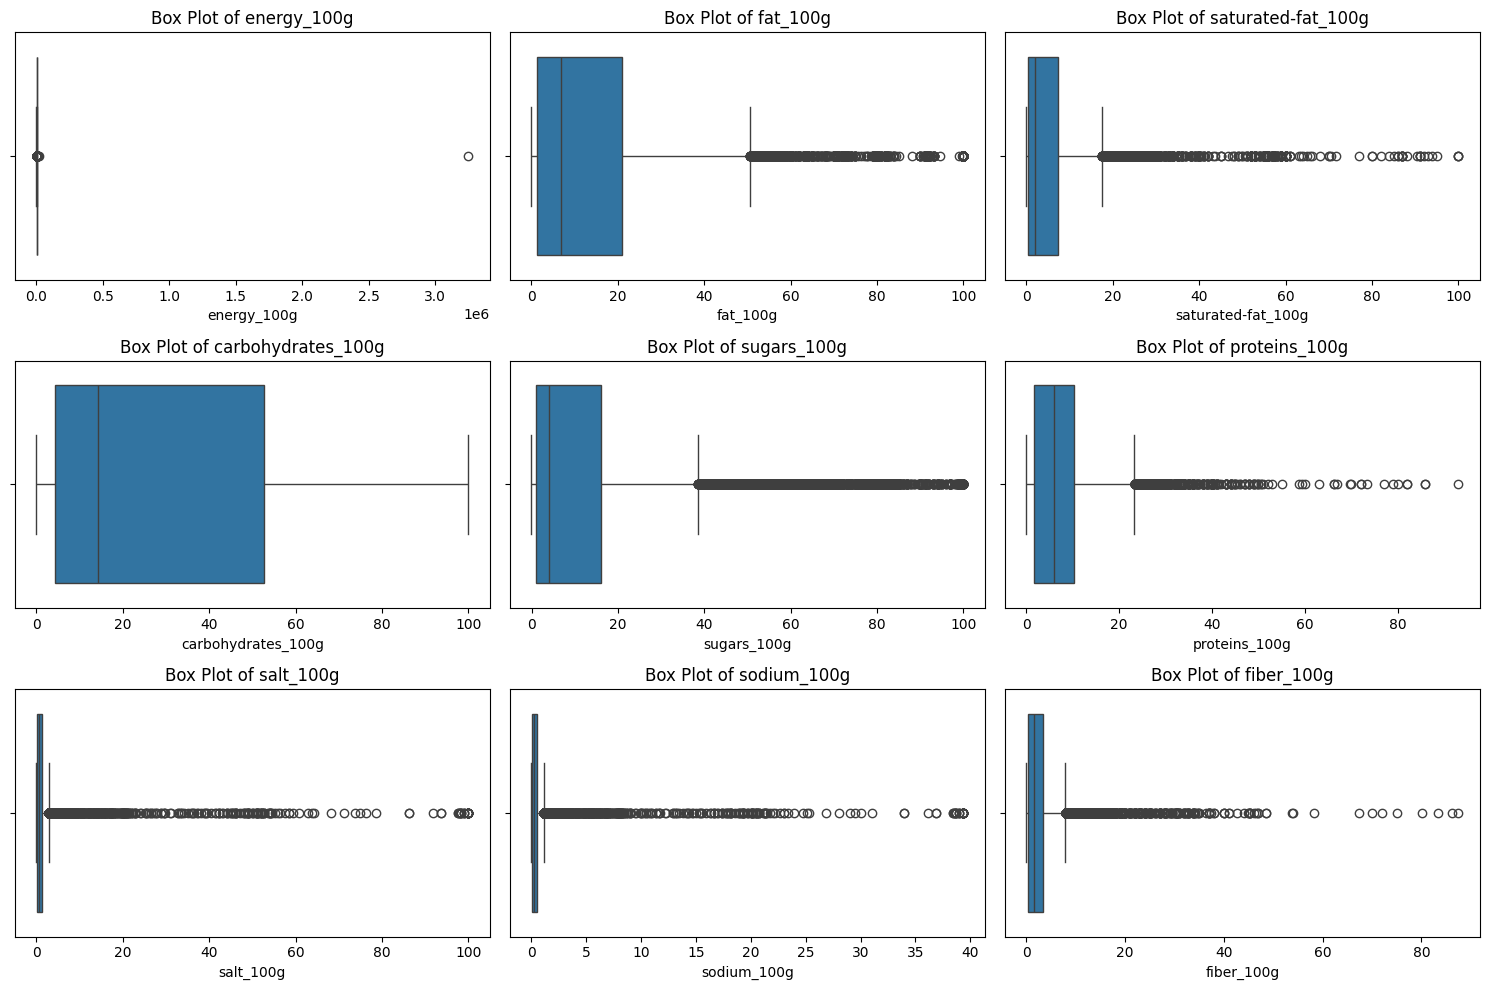

In [17]:
def plot_boxplots(df, features):
    plt.figure(figsize=(15, 10))
    for i, feature in enumerate(features, 1):
        plt.subplot(3, 3, i)
        sns.boxplot(x=df[feature])
        plt.title(f'Box Plot of {feature}')
    plt.tight_layout()
    plt.show()

# Liste des features quantitatives
quantitative_features = [
    'energy_100g', 'fat_100g', 'saturated-fat_100g',
    'carbohydrates_100g', 'sugars_100g', 'proteins_100g',
    'salt_100g', 'sodium_100g', 'fiber_100g'
]

# Affichage des boxplots
plot_boxplots(X_processed, quantitative_features)

Histogrammes pour Visualiser la Distribution des Données

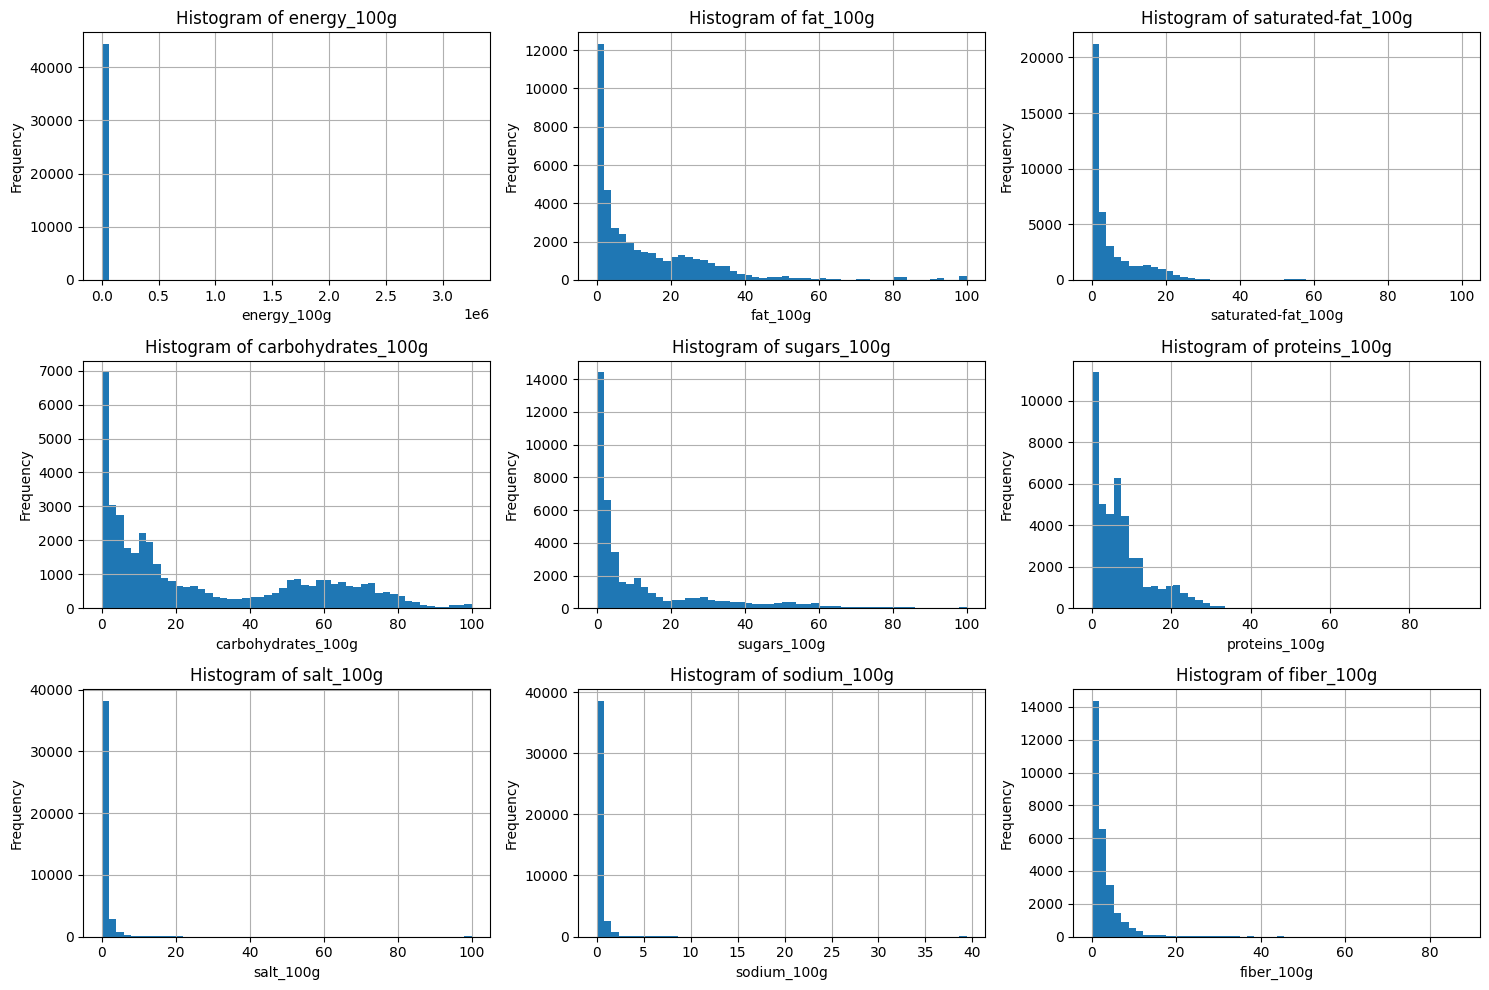

In [18]:
def plot_histograms(df, features, bins=50):
    plt.figure(figsize=(15, 10))
    for i, feature in enumerate(features, 1):
        plt.subplot(3, 3, i)
        df[feature].hist(bins=bins)
        plt.title(f'Histogram of {feature}')
        plt.xlabel(feature)
        plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

# Affichage des histogrammes
plot_histograms(X_processed, quantitative_features)

## Identification des Valeurs Aberrantes

### Approche Orientée Métier

#### Fonction pour compter les valeurs à 0 et afficher les graphiques des catégories

In [19]:
def count_and_plot_zero_values(df, feature):
    # Compter le nombre de valeurs à 0 dans la feature spécifiée
    zero_values = df[df[feature] == 0]
    print(f'Nombre de valeurs à 0 dans {feature} : {zero_values.shape[0]}')
    
    # Compter et afficher les valeurs uniques des groupes pnns pour les produits avec 0 dans la feature spécifiée
    pnns_groups_1_counts = zero_values['pnns_groups_1'].value_counts()
    pnns_groups_2_counts = zero_values['pnns_groups_2'].value_counts()

    plt.figure(figsize=(16, 6))
    
    plt.subplot(1, 2, 1)
    pnns_groups_1_counts.plot(kind='bar')
    plt.title(f'Valeurs uniques de pnns_groups_1 pour les produits avec 0 dans {feature}')
    plt.xlabel('pnns_groups_1')
    plt.ylabel('Count')
    
    plt.subplot(1, 2, 2)
    pnns_groups_2_counts.plot(kind='bar')
    plt.title(f'Valeurs uniques de pnns_groups_2 pour les produits avec 0 dans {feature}')
    plt.xlabel('pnns_groups_2')
    plt.ylabel('Count')

    plt.tight_layout()
    plt.show()

    return zero_values

#### Fonction pour exclure les catégories valides et supprimer les valeurs suspectes

In [20]:
def exclude_valid_categories(df, zero_values, feature, valid_categories_1, valid_categories_2, y):
    # Exclure les produits appartenant aux catégories valides spécifiées
    excluded_zero_values = zero_values[
        ~(
            zero_values['pnns_groups_1'].isin(valid_categories_1) |
            zero_values['pnns_groups_2'].isin(valid_categories_2)
        )
    ]
    
    # Compter le nombre de valeurs à 0 restantes après exclusion
    excluded_count = excluded_zero_values.shape[0]
    print(f'Nombre de valeurs à 0 dans {feature} après exclusion : {excluded_count}')
    
    # Supprimer les valeurs suspectes du dataframe
    df = df.drop(excluded_zero_values.index)
    
    # Synchroniser X et y après suppression des lignes
    df, y = synchronize_X_y(df, y)
    
    return df, y

#### Fonction pour définir et gérer les seuils

In [21]:
# Fonction pour gérer les valeurs aberrantes
def handle_outliers(df, feature, low_threshold, high_threshold, y):
    # Compter les valeurs en dessous du seuil minimum et au-dessus du seuil maximum
    below_min = df[(df[feature] < low_threshold) & (df[feature] != 0)].shape[0]
    above_max = df[df[feature] > high_threshold].shape[0]

    print(f'Nombre de valeurs en dessous de {low_threshold} g (sans compter les 0) pour {feature} :', below_min)
    print(f'Nombre de valeurs au-dessus de {high_threshold} g pour {feature} :', above_max)

    # Identifier et supprimer les valeurs en dehors des seuils définis
    indices_to_remove = df[(df[feature] > high_threshold) | ((df[feature] < low_threshold) & (df[feature] != 0))].index
    df = df.drop(indices_to_remove)
    
    # Synchroniser X et y après suppression des lignes
    df, y = synchronize_X_y(df, y)
    
    return df, y

#### Feature 'energy_100g'

Nombre de valeurs à 0 dans energy_100g : 188


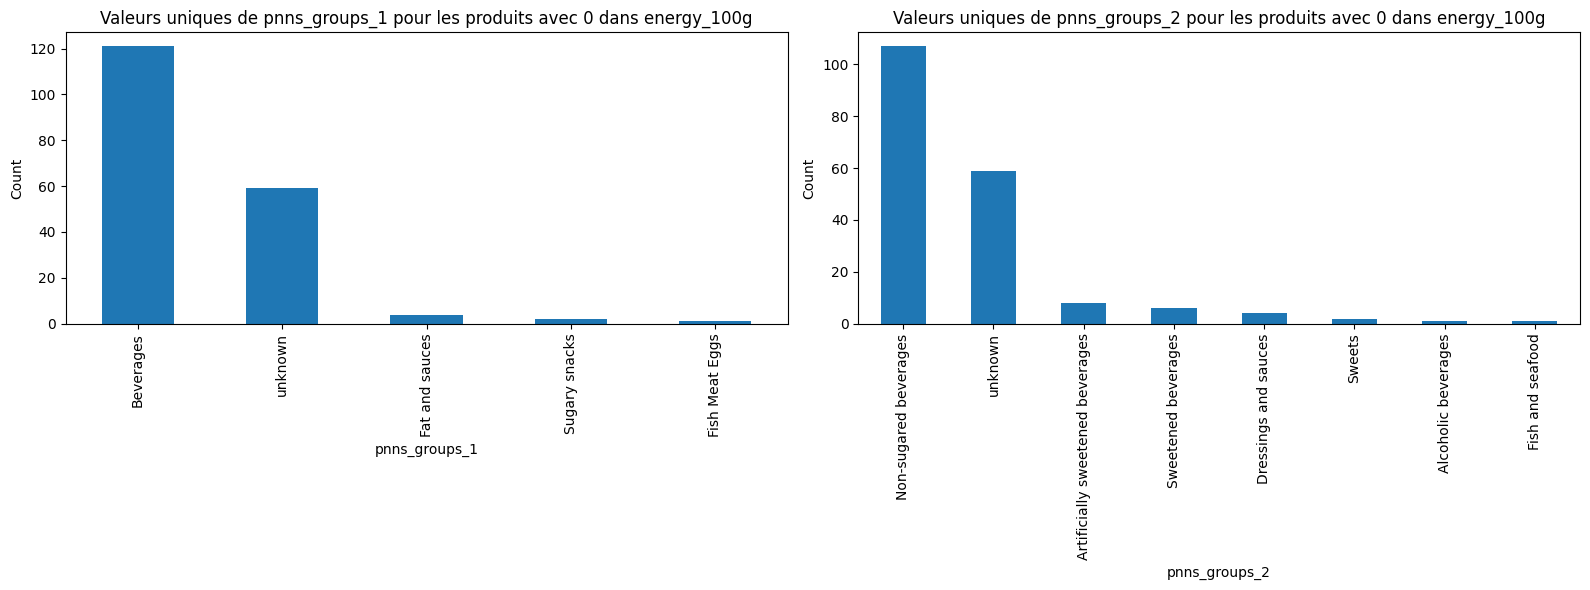

In [22]:
# Compter et afficher les valeurs à 0 pour 'energy_100g'
zero_energy_products = count_and_plot_zero_values(X_processed, 'energy_100g')

In [23]:
# Définir les catégories valides pour 'energy_100g' et exclure les valeurs suspectes
valid_categories_energy_1 = ['Beverages', 'unknown', ]
valid_categories_energy_2 = ['Non-sugared beverages', 'Artificially sweetened beverages', 'unknown']

X_processed, y_processed = exclude_valid_categories(X_processed, zero_energy_products, 'energy_100g', valid_categories_energy_1, valid_categories_energy_2, y_processed)

Nombre de valeurs à 0 dans energy_100g après exclusion : 8
Dimensions de X synchronisé : (52633, 13)
Dimensions de y synchronisé : (52633, 1)


In [24]:
# Définir les seuils pour 'energy_100g' et gérer les valeurs aberrantes
low_energy = 63  # 15 kcal en kJ
high_energy = 3766  # 900 kcal en kJ

X_processed, y_processed = handle_outliers(X_processed, 'energy_100g', low_energy, high_energy, y_processed)

Nombre de valeurs en dessous de 63 g (sans compter les 0) pour energy_100g : 663
Nombre de valeurs au-dessus de 3766 g pour energy_100g : 33
Dimensions de X synchronisé : (51937, 13)
Dimensions de y synchronisé : (51937, 1)


#### Features 'fat_100g'

Nombre de valeurs à 0 dans fat_100g : 2907


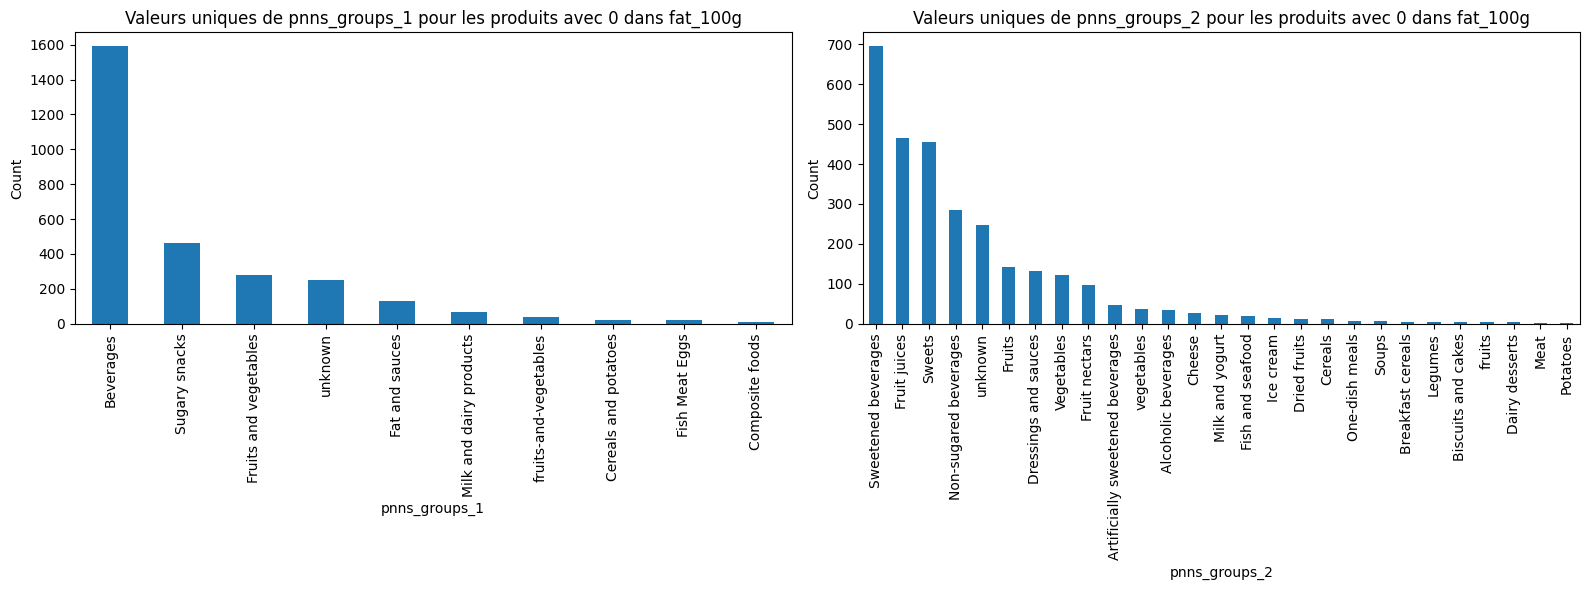

In [25]:
# Compter et afficher les valeurs à 0 pour 'fat_100g'
zero_fat_products = count_and_plot_zero_values(X_processed, 'fat_100g')

In [26]:
# Définir les catégories valides pour 'fat_100g' et exclure les valeurs suspectes
valid_categories_fat_1 = ['Beverages', 'unknown', 'Fruits and vegetables', 'fruits-and-vegetables']
valid_categories_fat_2 = [
    'Sweetened beverages', 'unknown', 'Fruits', 'Non-sugared beverages', 'Sweets',
    'Fruit juices', 'Artificially sweetened beverages', 'Fruit nectars',
    'Vegetables', 'Alcoholic beverages', 'vegetables', 'Dried fruits',
    'fruits', 'Soups', 'Legumes'
    ]

X_processed, y_processed = exclude_valid_categories(X_processed, zero_fat_products, 'fat_100g', valid_categories_fat_1, valid_categories_fat_2, y_processed)

Nombre de valeurs à 0 dans fat_100g après exclusion : 252
Dimensions de X synchronisé : (51685, 13)
Dimensions de y synchronisé : (51685, 1)


In [27]:
# Définir les seuils pour 'fat_100g' et gérer les valeurs aberrantes
low_fat = 0  # 0 g est le minimum logique
high_fat = 100  # 100 g pour 100 g de produit est le maximum logique

X_processed, y_processed = handle_outliers(X_processed, 'fat_100g', low_fat, high_fat, y_processed)

Nombre de valeurs en dessous de 0 g (sans compter les 0) pour fat_100g : 0
Nombre de valeurs au-dessus de 100 g pour fat_100g : 0
Dimensions de X synchronisé : (51685, 13)
Dimensions de y synchronisé : (51685, 1)


#### Features 'saturated-fat_100g'

Nombre de valeurs à 0 dans saturated-fat_100g : 4914


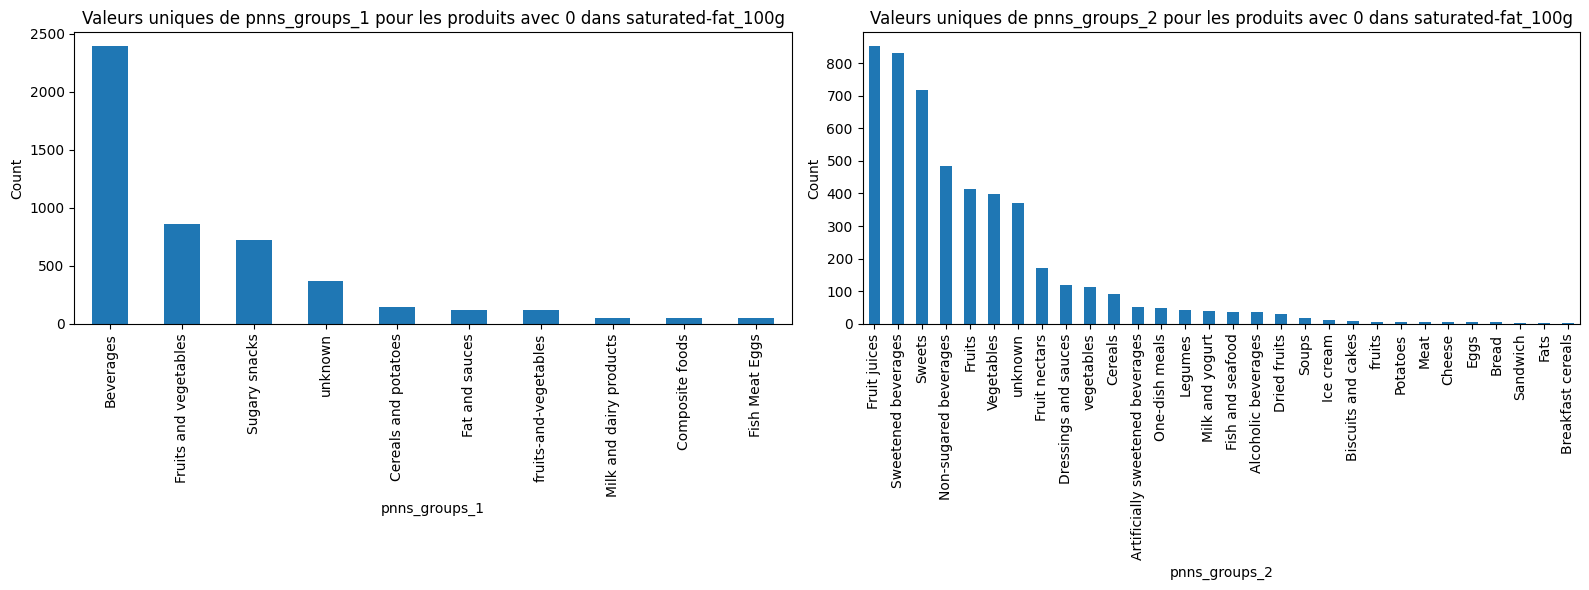

In [28]:
# Compter et afficher les valeurs à 0 pour 'saturated-fat_100g'
zero_saturated_fat_products = count_and_plot_zero_values(X_processed, 'saturated-fat_100g')

In [29]:
# Définir les catégories valides pour 'saturated-fat_100g' et exclure les valeurs suspectes
valid_categories_saturated_fat_1 = ['Beverages', 'unknown', 'Fruits and vegetables', 'fruits-and-vegetables']
valid_categories_saturated_fat_2 = [
    'Sweetened beverages', 'unknown', 'Non-sugared beverages', 'Fruits', 'Fruit juices',
    'Vegetables', 'vegetables', 'Artificially sweetened beverages', 'Fruit nectars',
    'Alcoholic beverages', 'Dried fruits', 'Legumes', 'Soups', 'fruits'
    ]

X_processed, y_processed = exclude_valid_categories(X_processed, zero_saturated_fat_products, 'saturated-fat_100g', valid_categories_saturated_fat_1, valid_categories_saturated_fat_2, y_processed)

Nombre de valeurs à 0 dans saturated-fat_100g après exclusion : 1095
Dimensions de X synchronisé : (50590, 13)
Dimensions de y synchronisé : (50590, 1)


In [30]:
# Définir les seuils pour 'saturated-fat_100g' et gérer les valeurs aberrantes
low_saturated_fat = 0  # 0 g est le minimum logique
high_saturated_fat = 100  # 100 g pour 100 g de produit est le maximum logique

X_processed, y_processed = handle_outliers(X_processed, 'saturated-fat_100g', low_saturated_fat, high_saturated_fat, y_processed)

Nombre de valeurs en dessous de 0 g (sans compter les 0) pour saturated-fat_100g : 0
Nombre de valeurs au-dessus de 100 g pour saturated-fat_100g : 0
Dimensions de X synchronisé : (50590, 13)
Dimensions de y synchronisé : (50590, 1)


#### Feature 'carbohydrates_100g'

Nombre de valeurs à 0 dans carbohydrates_100g : 1585


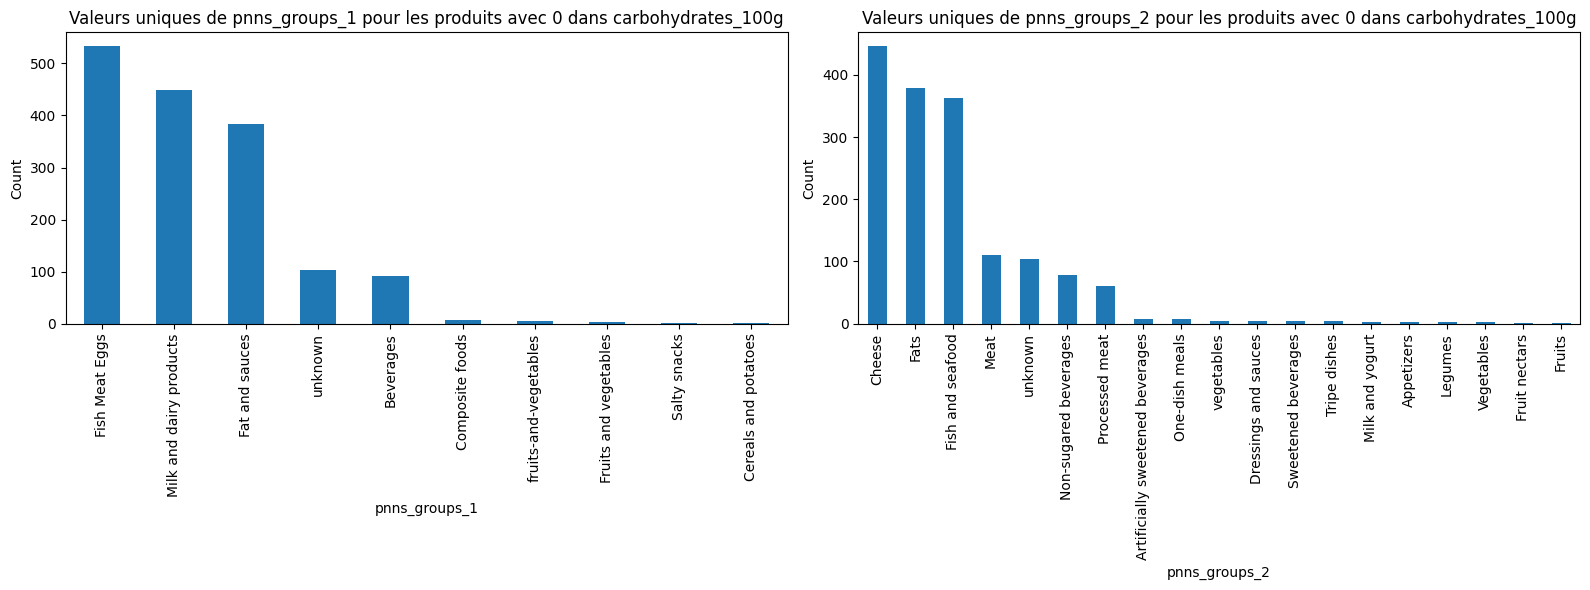

In [31]:
# Compter et afficher les valeurs à 0 pour 'carbohydrates_100g'
zero_carbohydrates_products = count_and_plot_zero_values(X_processed, 'carbohydrates_100g')

In [32]:
# Définir les catégories valides pour 'carbohydrates_100g' et exclure les valeurs suspectes
valid_categories_carbohydrates_1 = ['Beverages', 'unknown', 'Fish Meat Eggs', 'Fat and sauces']
valid_categories_carbohydrates_2 = [
    'Non-sugared beverages', 'unknown', 'Meat', 'Fats', 'Fish and seafood', 'Processed meat',
    'Artificially sweetened beverages', 'Tripe dishes', 'Dressings and sauces'
]

X_processed, y_processed = exclude_valid_categories(X_processed, zero_carbohydrates_products, 'carbohydrates_100g', valid_categories_carbohydrates_1, valid_categories_carbohydrates_2, y_processed)

Nombre de valeurs à 0 dans carbohydrates_100g après exclusion : 468
Dimensions de X synchronisé : (50122, 13)
Dimensions de y synchronisé : (50122, 1)


In [33]:
# Définir les seuils pour 'carbohydrates_100g' et gérer les valeurs aberrantes
low_carbohydrates = 0  # 0 g est le minimum logique
high_carbohydrates = 100  # 100 g pour 100 g de produit est le maximum logique

X_processed, y_processed = handle_outliers(X_processed, 'carbohydrates_100g', low_carbohydrates, high_carbohydrates, y_processed)

Nombre de valeurs en dessous de 0 g (sans compter les 0) pour carbohydrates_100g : 0
Nombre de valeurs au-dessus de 100 g pour carbohydrates_100g : 0
Dimensions de X synchronisé : (50122, 13)
Dimensions de y synchronisé : (50122, 1)


#### Feature 'sugars_100g'

Nombre de valeurs à 0 dans sugars_100g : 2062


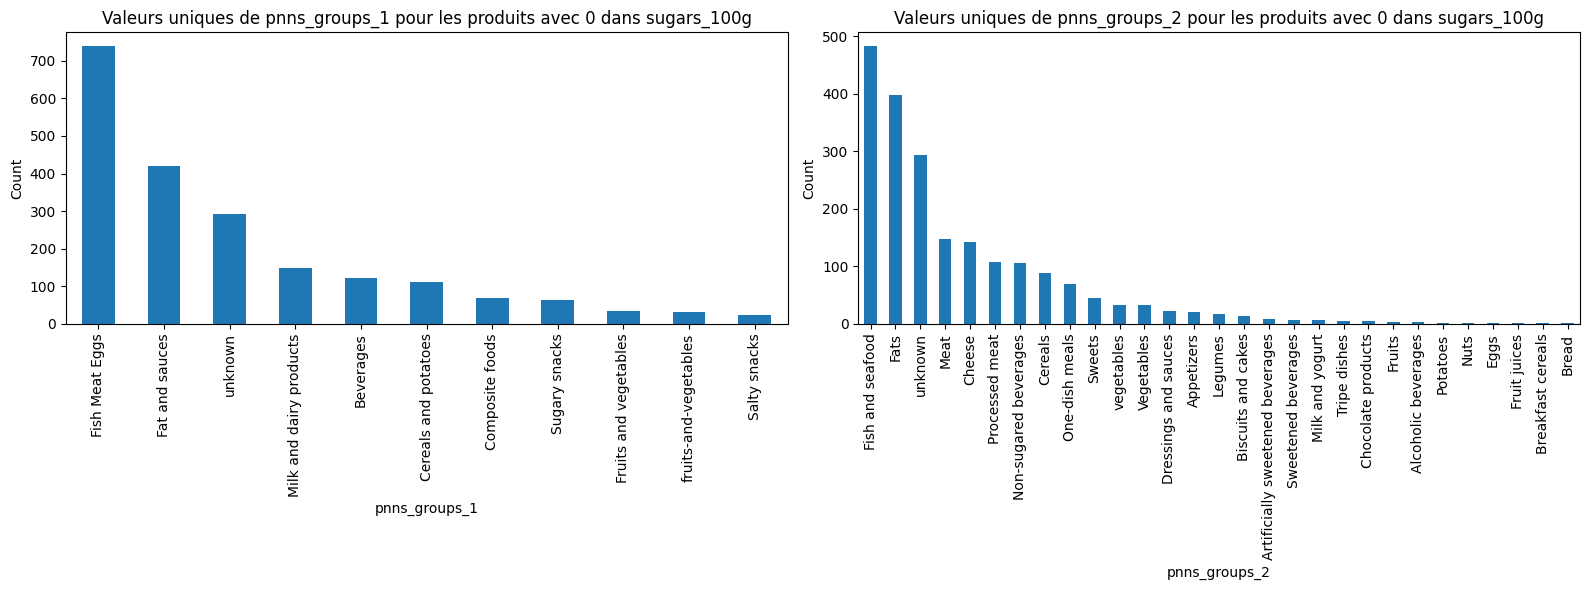

In [34]:
# Compter et afficher les valeurs à 0 pour 'sugars_100g'
zero_sugars_products = count_and_plot_zero_values(X_processed, 'sugars_100g')

In [35]:
# Définir les catégories valides pour 'sugars_100g' et exclure les valeurs suspectes
valid_categories_sugars_1 = ['Beverages', 'unknown', 'Fruits and vegetables', 'fruits-and-vegetables', 'Fish Meat Eggs', 'Fat and sauces']
valid_categories_sugars_2 = [
    'Non-sugared beverages', 'unknown', 'Vegetables', 'vegetables', 'Meat', 'Fats', 'Fish and seafood',
    'Processed meat', 'Artificially sweetened beverages', 'Dressings and sauces',
    'Legumes', 'Alcoholic beverages', 'Tripe dishes', 'Eggs'
]

X_processed, y_processed = exclude_valid_categories(X_processed, zero_sugars_products, 'sugars_100g', valid_categories_sugars_1, valid_categories_sugars_2, y_processed)

Nombre de valeurs à 0 dans sugars_100g après exclusion : 396
Dimensions de X synchronisé : (49726, 13)
Dimensions de y synchronisé : (49726, 1)


In [36]:
# Définir les seuils pour 'sugars_100g' et gérer les valeurs aberrantes
low_sugars = 0  # 0 g est le minimum logique
high_sugars = 100  # 100 g pour 100 g de produit est le maximum logique

X_processed, y_processed = handle_outliers(X_processed, 'sugars_100g', low_sugars, high_sugars, y_processed)

Nombre de valeurs en dessous de 0 g (sans compter les 0) pour sugars_100g : 1
Nombre de valeurs au-dessus de 100 g pour sugars_100g : 0
Dimensions de X synchronisé : (49725, 13)
Dimensions de y synchronisé : (49725, 1)


#### Feature 'proteins_100g'

Nombre de valeurs à 0 dans proteins_100g : 1991


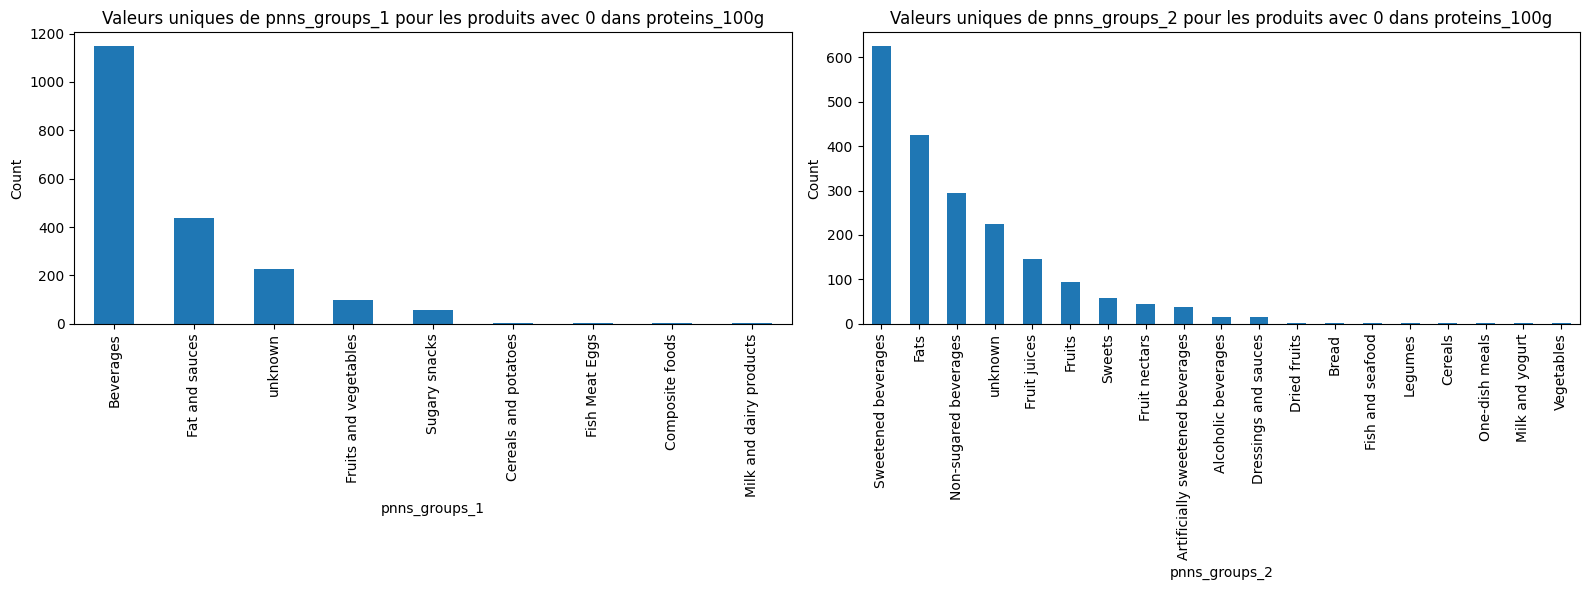

In [37]:
# Compter et afficher les valeurs à 0 pour 'proteins_100g'
zero_proteins_products = count_and_plot_zero_values(X_processed, 'proteins_100g')

In [38]:
# Définir les catégories valides pour 'proteins_100g' et exclure les valeurs suspectes
valid_categories_proteins_1 = ['Beverages', 'unknown', 'Fat and sauces']
valid_categories_proteins_2 = [
    'Sweetened beverages', 'Non-sugared beverages', 'unknown', 'Fats', 'Fruit juices', 'Artificially sweetened beverages',
    'Fruit nectars', 'Dressings and sauces', 'Alcoholic beverages', 'Dried fruits', 'Fruits',
    'Legumes', 'Vegetables'
]

X_processed, y_processed = exclude_valid_categories(X_processed, zero_proteins_products, 'proteins_100g', valid_categories_proteins_1, valid_categories_proteins_2, y_processed)

Nombre de valeurs à 0 dans proteins_100g après exclusion : 65
Dimensions de X synchronisé : (49660, 13)
Dimensions de y synchronisé : (49660, 1)


In [39]:
# Définir les seuils pour 'proteins_100g' et gérer les valeurs aberrantes
low_proteins = 0  # 0 g est le minimum logique
high_proteins = 100  # 100 g pour 100 g de produit est le maximum logique

X_processed, y_processed = handle_outliers(X_processed, 'proteins_100g', low_proteins, high_proteins, y_processed)

Nombre de valeurs en dessous de 0 g (sans compter les 0) pour proteins_100g : 0
Nombre de valeurs au-dessus de 100 g pour proteins_100g : 0
Dimensions de X synchronisé : (49660, 13)
Dimensions de y synchronisé : (49660, 1)


#### Feature 'salt_100g'

Nombre de valeurs à 0 dans salt_100g : 2699


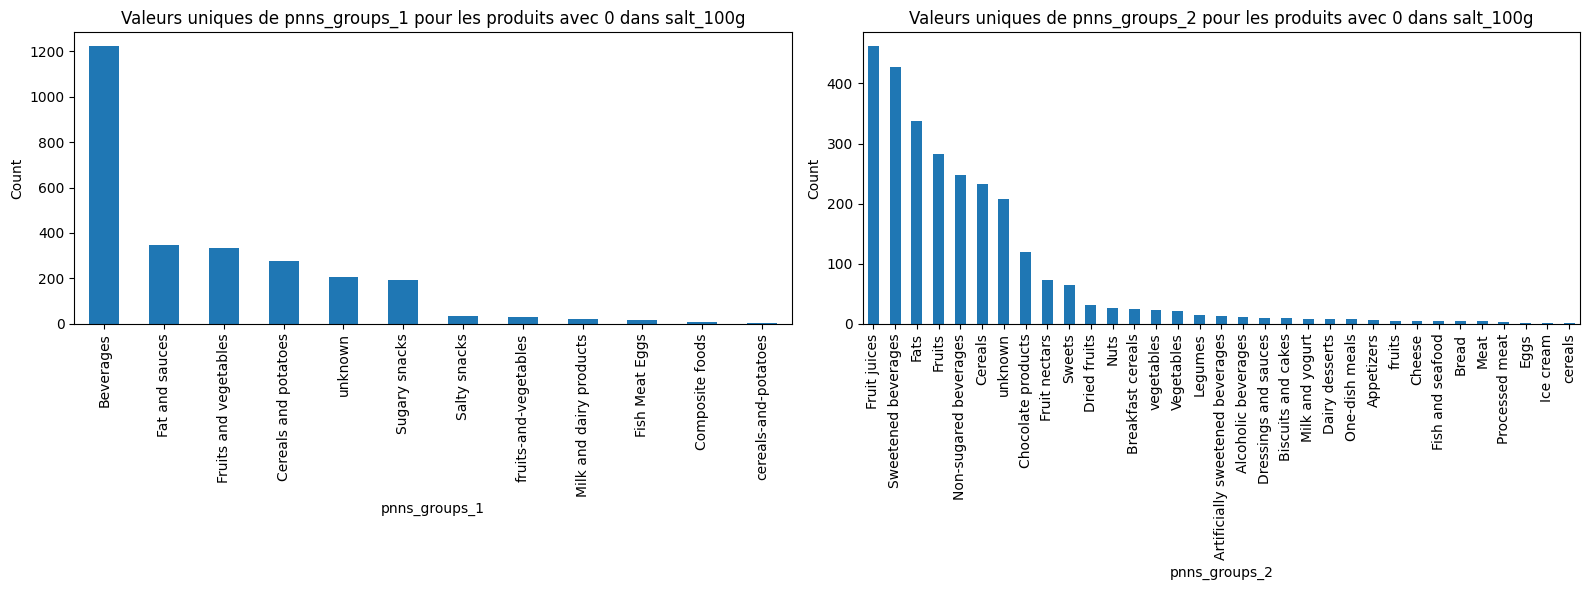

In [40]:
# Compter et afficher les valeurs à 0 pour 'salt_100g'
zero_salt_products = count_and_plot_zero_values(X_processed, 'salt_100g')

In [41]:
# Définir les catégories valides pour 'salt_100g' et exclure les valeurs suspectes
valid_categories_salt_1 = ['unknown', 'Beverages', 'Fruits and vegetables', 'Fish Meat Eggs', 'Fat and sauces']
valid_categories_salt_2 = [
    'unknown', 'Non-sugared beverages', 'Fruits', 'fruits', 'Legumes', 'Vegetables', 'vegetables',
    'Fats', 'Fruit juices', 'Dried fruits', 'Alcoholic beverages', 'Artificially sweetened beverages',
    'Fruit nectars', 'Eggs', 'Ice cream'
]

X_processed, y_processed = exclude_valid_categories(X_processed, zero_salt_products, 'salt_100g', valid_categories_salt_1, valid_categories_salt_2, y_processed)

Nombre de valeurs à 0 dans salt_100g après exclusion : 517
Dimensions de X synchronisé : (49143, 13)
Dimensions de y synchronisé : (49143, 1)


In [42]:
# Définir les seuils pour 'salt_100g' et gérer les valeurs aberrantes
low_salt = 0  # 0 g est le minimum logique
high_salt = 100  # 100 g pour 100 g de produit est le maximum logique

X_processed, y_processed = handle_outliers(X_processed, 'salt_100g', low_salt, high_salt, y_processed)

Nombre de valeurs en dessous de 0 g (sans compter les 0) pour salt_100g : 0
Nombre de valeurs au-dessus de 100 g pour salt_100g : 0
Dimensions de X synchronisé : (49143, 13)
Dimensions de y synchronisé : (49143, 1)


#### Feature 'sodium_100g'

Nombre de valeurs à 0 dans sodium_100g : 2181


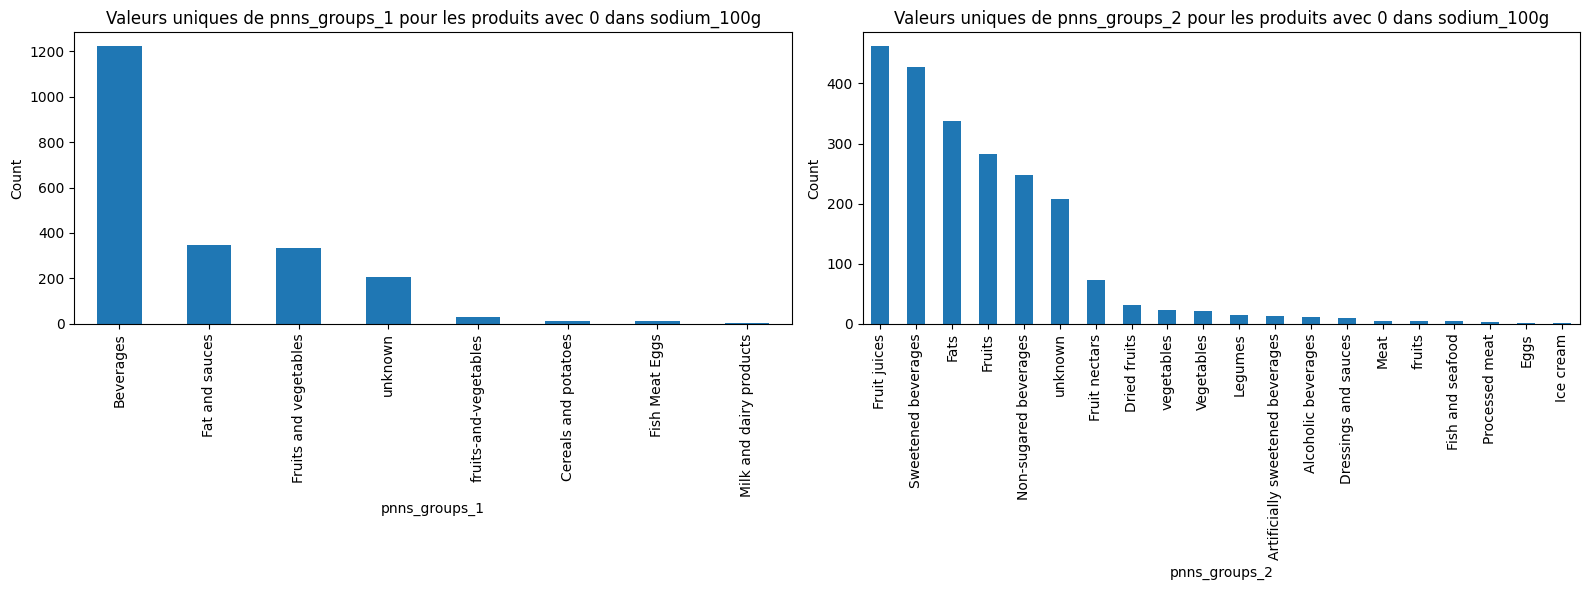

In [43]:
# Compter et afficher les valeurs à 0 pour 'sodium_100g'
zero_sodium_products = count_and_plot_zero_values(X_processed, 'sodium_100g')

In [44]:
# Définir les catégories valides pour 'sodium_100g' et exclure les valeurs suspectes
valid_categories_sodium_1 = ['unknown', 'Beverages', 'Fruits and vegetables', 'Fish Meat Eggs', 'Fat and sauces']
valid_categories_sodium_2 = [
    'unknown', 'Non-sugared beverages', 'Fruits', 'fruits', 'Legumes', 'Vegetables', 'vegetables',
    'Fats', 'Fruit juices', 'Dried fruits', 'Alcoholic beverages', 'Artificially sweetened beverages',
    'Fruit nectars', 'Eggs', 'Ice cream'
]

X_processed, y_processed = exclude_valid_categories(X_processed, zero_sodium_products, 'sodium_100g', valid_categories_sodium_1, valid_categories_sodium_2, y_processed)

Nombre de valeurs à 0 dans sodium_100g après exclusion : 0
Dimensions de X synchronisé : (49143, 13)
Dimensions de y synchronisé : (49143, 1)


In [45]:
# Définir les seuils pour 'sodium_100g' et gérer les valeurs aberrantes
low_sodium = 0  # 0 g est le minimum logique
high_sodium = 100  # 100 g pour 100 g de produit est le maximum logique

X_processed, y_processed = handle_outliers(X_processed, 'sodium_100g', low_sodium, high_sodium, y_processed)

Nombre de valeurs en dessous de 0 g (sans compter les 0) pour sodium_100g : 0
Nombre de valeurs au-dessus de 100 g pour sodium_100g : 0
Dimensions de X synchronisé : (49143, 13)
Dimensions de y synchronisé : (49143, 1)


#### Feature 'fiber_100g'

Nombre de valeurs à 0 dans fiber_100g : 4754


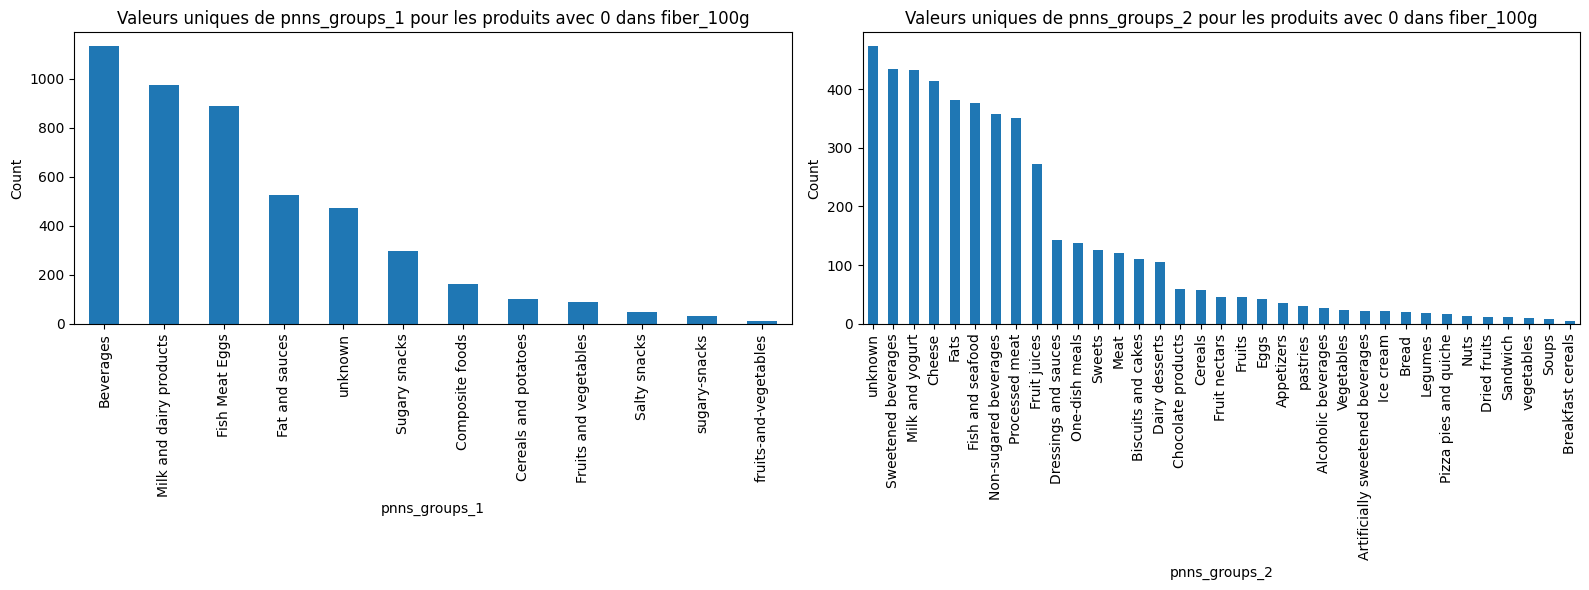

In [46]:
# Compter et afficher les valeurs à 0 pour 'fiber_100g'
zero_fiber_products = count_and_plot_zero_values(X_processed, 'fiber_100g')

In [47]:
# Définir les catégories valides pour 'fiber_100g' et exclure les valeurs suspectes
valid_categories_fiber_1 = ['Beverages', 'unknown', 'Fat and sauces', 'Milk and dairy products', 'Fish Meat Eggs']
valid_categories_fiber_2 = [
    'Sweetened beverages', 'unknown', 'Non-sugared beverages', 'Fruit juices', 'Milk and yogurt', 'Ice cream',
    'Cheese', 'Fats', 'Meat', 'Artificially sweetened beverages', 'Fish and seafood', 'Alcoholic beverages',
    'Eggs'
]

X_processed, y_processed = exclude_valid_categories(X_processed, zero_fiber_products, 'fiber_100g', valid_categories_fiber_1, valid_categories_fiber_2, y_processed)

Nombre de valeurs à 0 dans fiber_100g après exclusion : 736
Dimensions de X synchronisé : (48407, 13)
Dimensions de y synchronisé : (48407, 1)


In [48]:
# Définir les seuils pour 'fiber_100g' et gérer les valeurs aberrantes
low_fiber = 0  # 0 g est le minimum logique
high_fiber = 100  # 100 g pour 100 g de produit est le maximum logique

X_processed, y_processed = handle_outliers(X_processed, 'fiber_100g', low_fiber, high_fiber, y_processed)

Nombre de valeurs en dessous de 0 g (sans compter les 0) pour fiber_100g : 0
Nombre de valeurs au-dessus de 100 g pour fiber_100g : 0
Dimensions de X synchronisé : (48407, 13)
Dimensions de y synchronisé : (48407, 1)


### Méthode Statistique : Plages Interquartiles (IQR)

In [49]:
# Fonction pour détecter les outliers par IQR
def detect_outliers_iqr(df, features):
    outliers = {}
    for feature in features:
        Q1 = df[feature].quantile(0.25)
        Q3 = df[feature].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers[feature] = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)][feature]
    return outliers

              Feature  Number of Observations  Number of Outliers  \
0         energy_100g                   40112                 221   
1            fat_100g                   38094                1464   
2  saturated-fat_100g                   38219                2720   
3  carbohydrates_100g                   37736                   0   
4         sugars_100g                   38303                4059   
5       proteins_100g                   39889                1928   
6           salt_100g                   38369                1958   
7         sodium_100g                   38367                1958   
8          fiber_100g                   24876                1482   

   Percentage of Outliers  
0                0.550957  
1                3.843125  
2                7.116879  
3                0.000000  
4               10.597081  
5                4.833413  
6                5.103078  
7                5.103344  
8                5.957549  


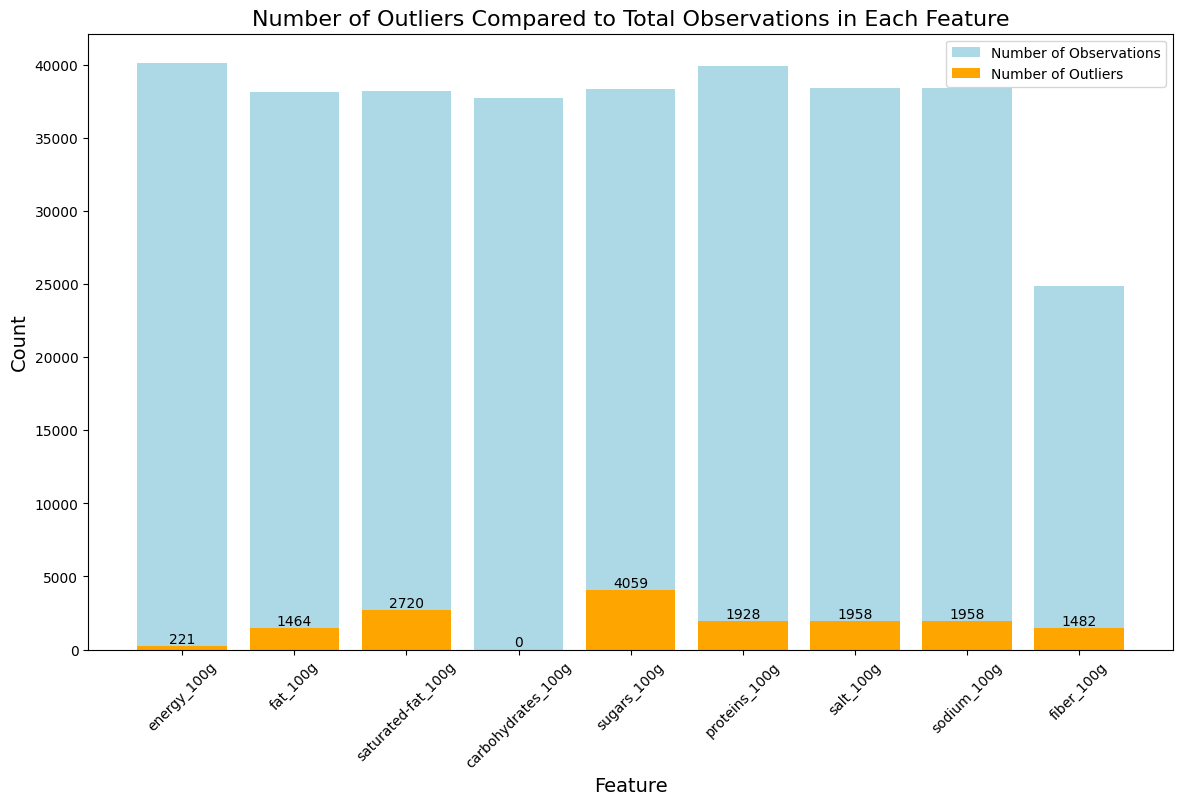

In [50]:
# Appliquer la fonction de détection des valeurs aberrantes par IQR
outliers = detect_outliers_iqr(X_processed, quantitative_features)

# Créer une liste pour stocker les résultats
results = []

# Calculer les statistiques pour chaque feature
for feature, values in outliers.items():
    total_elements = X_processed[feature].count()
    num_outliers = len(values)
    percent_outliers = (num_outliers / total_elements) * 100
    results.append([feature, total_elements, num_outliers, percent_outliers])

# Créer un DataFrame pour afficher les résultats
outliers_df = pd.DataFrame(results, columns=['Feature', 'Number of Observations', 'Number of Outliers', 'Percentage of Outliers'])

# Afficher le DataFrame
print(outliers_df)

# Visualiser les résultats sous forme de graphique
fig, ax = plt.subplots(figsize=(14, 8))

# Créer un graphique à barres pour le nombre total d'éléments et les outliers
total_bars = ax.bar(outliers_df['Feature'], outliers_df['Number of Observations'], color='lightblue', label='Number of Observations')
outliers_bars = ax.bar(outliers_df['Feature'], outliers_df['Number of Outliers'], color='orange', label='Number of Outliers')

# Ajouter des annotations pour le nombre d'outliers au-dessus des barres
for bar in outliers_bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center', fontsize=10, color='black')

# Titre et labels
ax.set_title('Number of Outliers Compared to Total Observations in Each Feature', fontsize=16)
ax.set_ylabel('Count', fontsize=14)
ax.set_xlabel('Feature', fontsize=14)
ax.legend()

# Affichage du graphique
plt.xticks(rotation=45)
plt.show()

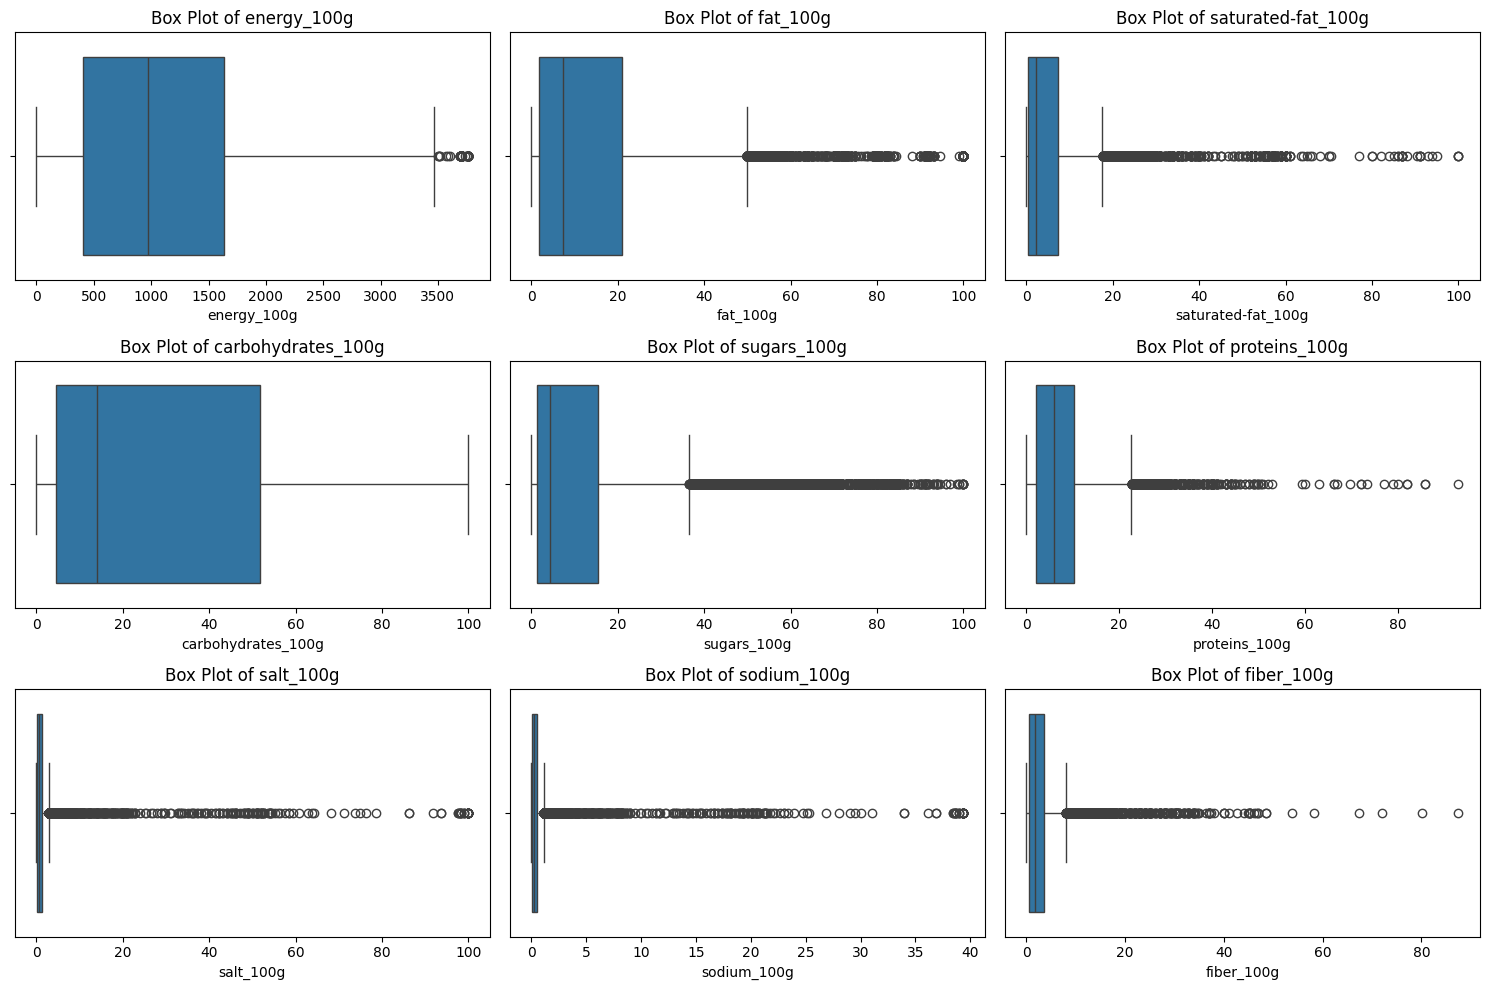

In [51]:
# Affichage des boxplots
plot_boxplots(X_processed, quantitative_features)

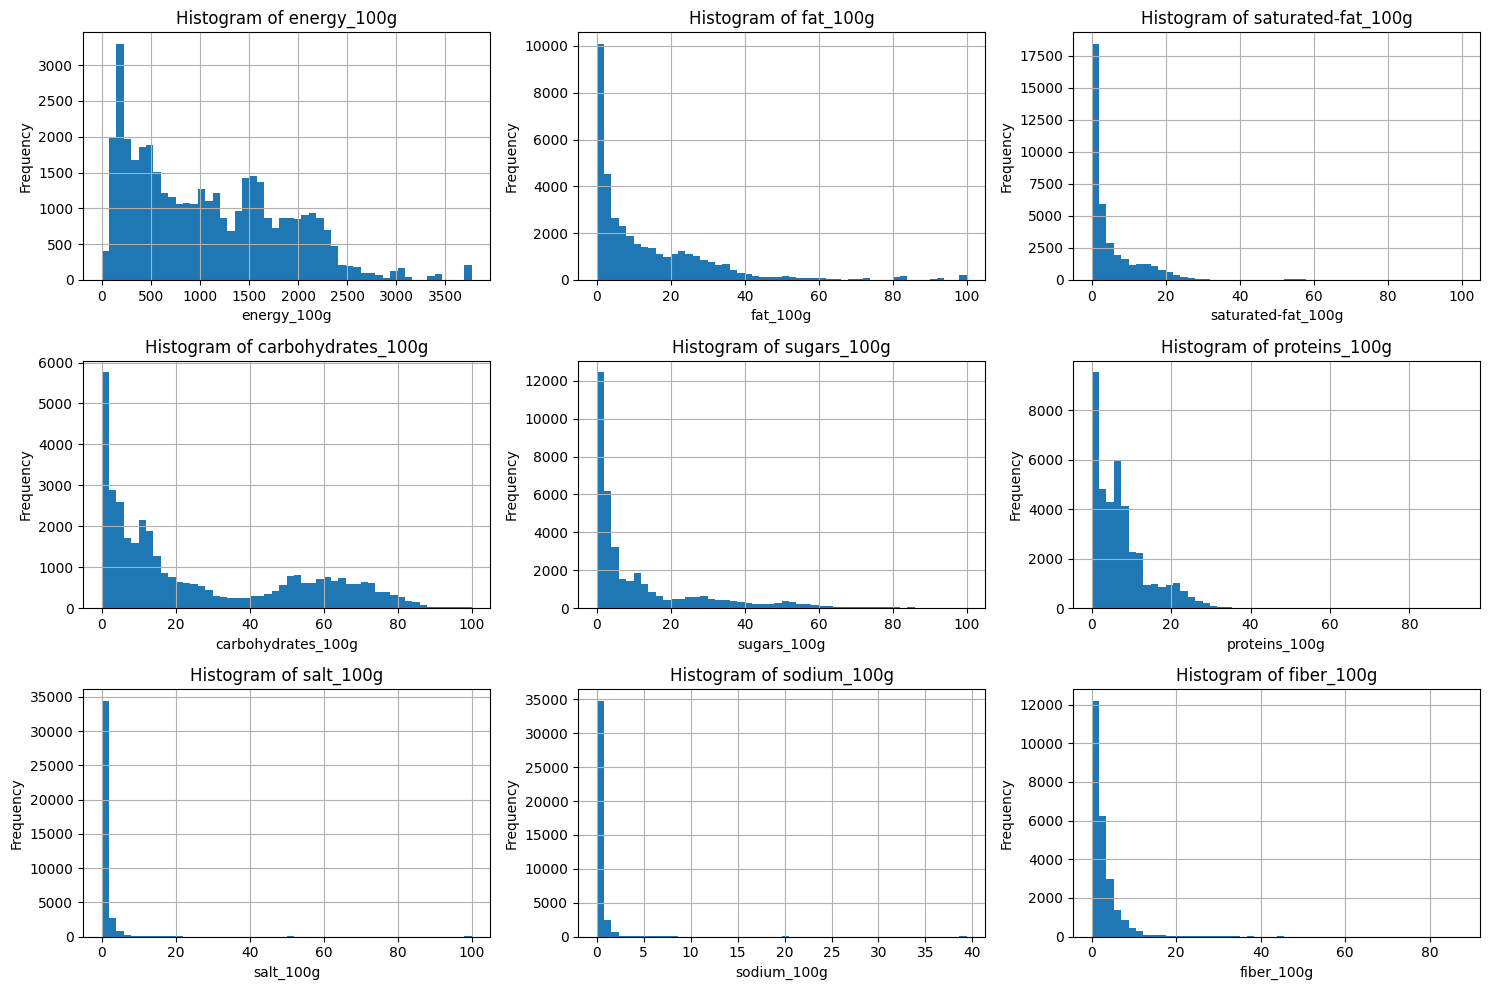

In [52]:
# Affichage des histogrammes
plot_histograms(X_processed, quantitative_features)

# Etape 3

In [53]:
def calculate_missing_percentage(df, additional_missing_values=[]):
    # Remplacer les valeurs supplémentaires par NaN
    df.replace(additional_missing_values, np.nan, inplace=True)
    
    # Calculer le pourcentage de valeurs manquantes pour chaque colonne
    missing_percentage = df.isnull().mean() * 100
    missing_df = pd.DataFrame(missing_percentage, columns=['missing_percentage'])
    missing_df = missing_df.reset_index().rename(columns={'index': 'column'})
    missing_df = missing_df.sort_values(by='missing_percentage', ascending=False)
    
    return missing_df

In [54]:
additional_missing_values = ["", " "]
missing_df = calculate_missing_percentage(X_processed, additional_missing_values)
print(missing_df)

                column  missing_percentage
8           fiber_100g           48.610738
3   carbohydrates_100g           22.044332
1             fat_100g           21.304770
2   saturated-fat_100g           21.046543
4          sugars_100g           20.873014
7          sodium_100g           20.740802
6            salt_100g           20.736670
5        proteins_100g           17.596629
0          energy_100g           17.135951
10       pnns_groups_1            3.003698
9               brands            0.347057
11       pnns_groups_2            0.000000
12     total_nutrients            0.000000


#### Fonction pour identifier les valeurs uniques et leurs fréquences

In [55]:
def missing_value_analysis(df, column, category_col):
    """
    Identifie les valeurs uniques d'une catégorie pour les lignes avec des valeurs manquantes 
    dans une colonne spécifique et compte leur fréquence.

    Parameters:
    - df: pandas DataFrame
    - column: la colonne à analyser pour les valeurs manquantes
    - category_col: la colonne des catégories

    Returns:
    - tuple: valeurs uniques et leurs fréquences
    """
    # Identifier les lignes avec des valeurs manquantes dans la colonne spécifiée
    missing_values = df[df[column].isnull()]
    
    # Obtenir les valeurs uniques de la colonne des catégories pour ces lignes
    unique_categories = missing_values[category_col].unique()
    
    # Compter la fréquence de chaque valeur unique
    category_counts = missing_values[category_col].value_counts()
    
    return unique_categories, category_counts

#### Fonction pour l'imputation par la médiane par catégorie

In [56]:
def impute_median_by_category(df, column, category_col):
    """
    Remplace les valeurs manquantes d'une colonne par la médiane de chaque catégorie.

    Parameters:
    - df: pandas DataFrame
    - column: la colonne à traiter
    - category_col: la colonne des catégories pour grouper par

    Returns:
    - pandas DataFrame avec les valeurs manquantes imputées
    """
    def fill_na_with_median(x):
        if x.notna().sum() == 0:  # Vérifier s'il y a des valeurs non manquantes
            return x.fillna(0)
        else:
            return x.fillna(x.median())
    
    df[column] = df.groupby(category_col)[column].transform(fill_na_with_median)
    return df

#### Fiber_100g

In [57]:
# Remplacer les valeurs manquantes dans 'fiber_100g' par 0
X_processed['fiber_100g'] = X_processed['fiber_100g'].fillna(0)

# Vérifier le taux de remplissage après le remplacement
missing_percentage_after = calculate_missing_percentage(X_processed)
print(missing_percentage_after)

                column  missing_percentage
3   carbohydrates_100g           22.044332
1             fat_100g           21.304770
2   saturated-fat_100g           21.046543
4          sugars_100g           20.873014
7          sodium_100g           20.740802
6            salt_100g           20.736670
5        proteins_100g           17.596629
0          energy_100g           17.135951
10       pnns_groups_1            3.003698
9               brands            0.347057
8           fiber_100g            0.000000
11       pnns_groups_2            0.000000
12     total_nutrients            0.000000


#### Carbohydrates_100g

In [58]:
# Identifier les lignes avec des valeurs manquantes dans 'carbohydrates_100g'
unique_pnns_groups_2_carbohydrates, pnns_groups_2_counts_carbohydrates = missing_value_analysis(X_processed, 'carbohydrates_100g', 'pnns_groups_2')

# Afficher les valeurs uniques et leurs fréquences
print("Valeurs uniques de 'pnns_groups_2' pour les lignes avec des valeurs manquantes dans 'carbohydrates_100g':")
print(unique_pnns_groups_2_carbohydrates)
print("\nFréquence de chaque valeur unique:")
print(pnns_groups_2_counts_carbohydrates)

Valeurs uniques de 'pnns_groups_2' pour les lignes avec des valeurs manquantes dans 'carbohydrates_100g':
['unknown' 'Legumes' 'Biscuits and cakes' 'Sweets' 'Non-sugared beverages'
 'Meat' 'Sweetened beverages' 'One-dish meals' 'Chocolate products'
 'Alcoholic beverages' 'Sandwich' 'Appetizers' 'Dressings and sauces'
 'Cheese' 'Fruits' 'Fats' 'Vegetables' 'Breakfast cereals' 'Nuts'
 'Fruit juices' 'Milk and yogurt' 'Dried fruits' 'Fish and seafood'
 'Ice cream' 'Bread' 'Tripe dishes' 'pastries' 'Processed meat'
 'Pizza pies and quiche' 'Dairy desserts' 'Cereals' 'Eggs' 'Soups'
 'Potatoes' 'Fruit nectars' 'vegetables' 'fruits'
 'Artificially sweetened beverages' 'legumes' 'Salty and fatty products']

Fréquence de chaque valeur unique:
pnns_groups_2
unknown                             1609
Alcoholic beverages                 1353
Non-sugared beverages                881
Cheese                               612
Sweets                               559
Processed meat                       

In [59]:
# Définir les catégories où 'carbohydrates_100g' peut être remplacé par 0
categories_with_zero_carbs = [
    'Meat', 'Fish and seafood', 'Processed meat', 'Tripe dishes', 'Non-sugared beverages', 'Fats'
]

# Remplacer les valeurs manquantes par 0 pour ces catégories spécifiques
X_processed.loc[
    (X_processed['carbohydrates_100g'].isnull()) & 
    (X_processed['pnns_groups_2'].isin(categories_with_zero_carbs)), 
    'carbohydrates_100g'
] = 0

# Vérifier le taux de remplissage après le remplacement
missing_percentage_after = calculate_missing_percentage(X_processed)
print(missing_percentage_after)

                column  missing_percentage
1             fat_100g           21.304770
2   saturated-fat_100g           21.046543
4          sugars_100g           20.873014
7          sodium_100g           20.740802
6            salt_100g           20.736670
5        proteins_100g           17.596629
3   carbohydrates_100g           17.491272
0          energy_100g           17.135951
10       pnns_groups_1            3.003698
9               brands            0.347057
8           fiber_100g            0.000000
11       pnns_groups_2            0.000000
12     total_nutrients            0.000000


In [60]:
# Imputation par la médiane pour 'carbohydrates_100g' par 'pnns_groups_2'
X_processed = impute_median_by_category(X_processed, 'carbohydrates_100g', 'pnns_groups_2')

# Vérifier le taux de remplissage après les imputations
missing_percentage_after = calculate_missing_percentage(X_processed)
print(missing_percentage_after)

                column  missing_percentage
1             fat_100g           21.304770
2   saturated-fat_100g           21.046543
4          sugars_100g           20.873014
7          sodium_100g           20.740802
6            salt_100g           20.736670
5        proteins_100g           17.596629
0          energy_100g           17.135951
10       pnns_groups_1            3.003698
9               brands            0.347057
3   carbohydrates_100g            0.000000
8           fiber_100g            0.000000
11       pnns_groups_2            0.000000
12     total_nutrients            0.000000


#### Fat_100g

In [61]:
# Identifier les lignes avec des valeurs manquantes dans 'fat_100g'
unique_pnns_groups_2_fat, pnns_groups_2_counts_fat = missing_value_analysis(X_processed, 'fat_100g', 'pnns_groups_2')

# Afficher les valeurs uniques et leurs fréquences
print("Valeurs uniques de 'pnns_groups_2' pour les lignes avec des valeurs manquantes dans 'fat_100g':")
print(unique_pnns_groups_2_fat)
print("\nFréquence de chaque valeur unique:")
print(pnns_groups_2_counts_fat)

Valeurs uniques de 'pnns_groups_2' pour les lignes avec des valeurs manquantes dans 'fat_100g':
['unknown' 'Legumes' 'Biscuits and cakes' 'Sweets' 'Non-sugared beverages'
 'Meat' 'Sweetened beverages' 'One-dish meals' 'Chocolate products'
 'Alcoholic beverages' 'Sandwich' 'Appetizers' 'Dressings and sauces'
 'Cheese' 'Fruits' 'Fats' 'Vegetables' 'Breakfast cereals' 'Nuts'
 'Fruit juices' 'Milk and yogurt' 'Dried fruits' 'Fish and seafood'
 'Ice cream' 'Bread' 'Tripe dishes' 'pastries' 'Processed meat'
 'Pizza pies and quiche' 'Cereals' 'Dairy desserts' 'Eggs' 'Soups'
 'Potatoes' 'Fruit nectars' 'vegetables' 'fruits'
 'Artificially sweetened beverages' 'legumes' 'Salty and fatty products']

Fréquence de chaque valeur unique:
pnns_groups_2
unknown                             1599
Alcoholic beverages                 1353
Non-sugared beverages                884
Sweets                               570
Processed meat                       443
One-dish meals                       424
Dressi

In [62]:
# Définir les catégories où 'fat_100g' peut être remplacé par 0
categories_with_zero_fat = [
    'Non-sugared beverages', 'Artificially sweetened beverages', 'Non-sugared beverages', 'Alcoholic beverages', 'Legumes',
    'Fruits', 'Vegetables', 'Fruit juices', 'vegetables', 'fruits', 'legumes'
]

# Remplacer les valeurs manquantes par 0 pour ces catégories spécifiques
X_processed.loc[
    (X_processed['fat_100g'].isnull()) & 
    (X_processed['pnns_groups_2'].isin(categories_with_zero_fat)), 
    'fat_100g'
] = 0

# Vérifier le taux de remplissage après le remplacement
missing_percentage_after = calculate_missing_percentage(X_processed)
print(missing_percentage_after)

                column  missing_percentage
2   saturated-fat_100g           21.046543
4          sugars_100g           20.873014
7          sodium_100g           20.740802
6            salt_100g           20.736670
5        proteins_100g           17.596629
0          energy_100g           17.135951
1             fat_100g           14.002107
10       pnns_groups_1            3.003698
9               brands            0.347057
3   carbohydrates_100g            0.000000
8           fiber_100g            0.000000
11       pnns_groups_2            0.000000
12     total_nutrients            0.000000


In [63]:
# Imputation par la médiane pour 'fat_100g' par 'pnns_groups_2'
X_processed = impute_median_by_category(X_processed, 'fat_100g', 'pnns_groups_2')

# Vérifier le taux de remplissage après les imputations
missing_percentage_after = calculate_missing_percentage(X_processed)
print(missing_percentage_after)

                column  missing_percentage
2   saturated-fat_100g           21.046543
4          sugars_100g           20.873014
7          sodium_100g           20.740802
6            salt_100g           20.736670
5        proteins_100g           17.596629
0          energy_100g           17.135951
10       pnns_groups_1            3.003698
9               brands            0.347057
1             fat_100g            0.000000
3   carbohydrates_100g            0.000000
8           fiber_100g            0.000000
11       pnns_groups_2            0.000000
12     total_nutrients            0.000000


#### Salt_100g

In [64]:
# Identifier les lignes avec des valeurs manquantes dans 'salt_100g'
unique_pnns_groups_2_salt, pnns_groups_2_counts_salt = missing_value_analysis(X_processed, 'salt_100g', 'pnns_groups_2')

# Afficher les valeurs uniques et leurs fréquences
print("Valeurs uniques de 'pnns_groups_2' pour les lignes avec des valeurs manquantes dans 'salt_100g':")
print(unique_pnns_groups_2_salt)
print("\nFréquence de chaque valeur unique:")
print(pnns_groups_2_counts_salt)

Valeurs uniques de 'pnns_groups_2' pour les lignes avec des valeurs manquantes dans 'salt_100g':
['unknown' 'Legumes' 'Biscuits and cakes' 'Sweets' 'Non-sugared beverages'
 'Meat' 'Sweetened beverages' 'Chocolate products' 'Alcoholic beverages'
 'Sandwich' 'Appetizers' 'Dressings and sauces' 'Dried fruits' 'Cheese'
 'One-dish meals' 'Fruits' 'Fats' 'Vegetables' 'Breakfast cereals' 'Nuts'
 'Fruit juices' 'Milk and yogurt' 'Fish and seafood' 'Ice cream' 'Bread'
 'Tripe dishes' 'pastries' 'Processed meat' 'Pizza pies and quiche'
 'Cereals' 'Dairy desserts' 'Eggs' 'Soups' 'vegetables' 'Potatoes'
 'Fruit nectars' 'fruits' 'Artificially sweetened beverages' 'legumes']

Fréquence de chaque valeur unique:
pnns_groups_2
unknown                             1498
Alcoholic beverages                 1351
Sweets                               601
Non-sugared beverages                599
Cheese                               557
One-dish meals                       458
Processed meat                   

In [65]:
# Définir les catégories où 'salt_100g' peut être remplacé par 0
categories_with_zero_salt = [
    'Legumes', 'Non-sugared beverages', 'Fruits', 'Vegetables', 'Fruit juices', 'Alcoholic beverages', 
    'Dried fruits', 'Nuts', 'Ice cream', 'Eggs', 'Fruit nectars', 'Artificially sweetened beverages'
]

# Remplacer les valeurs manquantes par 0 pour ces catégories spécifiques
X_processed.loc[
    (X_processed['salt_100g'].isnull()) & 
    (X_processed['pnns_groups_2'].isin(categories_with_zero_salt)), 
    'salt_100g'
] = 0

# Vérifier le taux de remplissage après le remplacement
missing_percentage_after = calculate_missing_percentage(X_processed)
print(missing_percentage_after)

                column  missing_percentage
2   saturated-fat_100g           21.046543
4          sugars_100g           20.873014
7          sodium_100g           20.740802
5        proteins_100g           17.596629
0          energy_100g           17.135951
6            salt_100g           13.857500
10       pnns_groups_1            3.003698
9               brands            0.347057
1             fat_100g            0.000000
3   carbohydrates_100g            0.000000
8           fiber_100g            0.000000
11       pnns_groups_2            0.000000
12     total_nutrients            0.000000


In [66]:
# Imputation par la médiane pour 'salt_100g' par 'pnns_groups_2'
X_processed = impute_median_by_category(X_processed, 'salt_100g', 'pnns_groups_2')

# Vérifier le taux de remplissage après les imputations
missing_percentage_after = calculate_missing_percentage(X_processed)
print(missing_percentage_after)

                column  missing_percentage
2   saturated-fat_100g           21.046543
4          sugars_100g           20.873014
7          sodium_100g           20.740802
5        proteins_100g           17.596629
0          energy_100g           17.135951
10       pnns_groups_1            3.003698
9               brands            0.347057
1             fat_100g            0.000000
3   carbohydrates_100g            0.000000
6            salt_100g            0.000000
8           fiber_100g            0.000000
11       pnns_groups_2            0.000000
12     total_nutrients            0.000000


#### Proteins_100g

In [67]:
# Identifier les lignes avec des valeurs manquantes dans 'proteins_100g'
unique_pnns_groups_2_proteins, pnns_groups_2_counts_proteins = missing_value_analysis(X_processed, 'proteins_100g', 'pnns_groups_2')

# Afficher les valeurs uniques et leurs fréquences
print("Valeurs uniques de 'pnns_groups_2' pour les lignes avec des valeurs manquantes dans 'proteins_100g':")
print(unique_pnns_groups_2_proteins)
print("\nFréquence de chaque valeur unique:")
print(pnns_groups_2_counts_proteins)

Valeurs uniques de 'pnns_groups_2' pour les lignes avec des valeurs manquantes dans 'proteins_100g':
['unknown' 'Legumes' 'Biscuits and cakes' 'Sweets' 'Non-sugared beverages'
 'Meat' 'Sweetened beverages' 'Chocolate products' 'Alcoholic beverages'
 'Sandwich' 'Appetizers' 'Dressings and sauces' 'Cheese' 'One-dish meals'
 'Fruits' 'Fats' 'Vegetables' 'Breakfast cereals' 'Nuts' 'Fruit juices'
 'Milk and yogurt' 'Fish and seafood' 'Ice cream' 'Bread' 'Tripe dishes'
 'pastries' 'Processed meat' 'Pizza pies and quiche' 'Dairy desserts'
 'Cereals' 'Eggs' 'Dried fruits' 'Soups' 'Potatoes' 'Fruit nectars'
 'vegetables' 'fruits' 'Artificially sweetened beverages' 'legumes']

Fréquence de chaque valeur unique:
pnns_groups_2
Alcoholic beverages                 1337
unknown                             1278
Non-sugared beverages                638
Sweets                               528
Cheese                               467
Fruits                               369
Processed meat               

In [68]:
# Définir les catégories où 'proteins_100g' peut être remplacé par 0
categories_with_zero_proteins = [
    'Non-sugared beverages', 'Sweetened beverages', 'Fruit juices', 'Artificially sweetened beverages', 
    'Alcoholic beverages', 'Sweets', 'Fats'
]

# Remplacer les valeurs manquantes par 0 pour ces catégories spécifiques
X_processed.loc[
    (X_processed['proteins_100g'].isnull()) & 
    (X_processed['pnns_groups_2'].isin(categories_with_zero_proteins)), 
    'proteins_100g'
] = 0

# Vérifier le taux de remplissage après le remplacement
missing_percentage_after = calculate_missing_percentage(X_processed)
print(missing_percentage_after)

                column  missing_percentage
2   saturated-fat_100g           21.046543
4          sugars_100g           20.873014
7          sodium_100g           20.740802
0          energy_100g           17.135951
5        proteins_100g           11.591299
10       pnns_groups_1            3.003698
9               brands            0.347057
1             fat_100g            0.000000
3   carbohydrates_100g            0.000000
6            salt_100g            0.000000
8           fiber_100g            0.000000
11       pnns_groups_2            0.000000
12     total_nutrients            0.000000


In [69]:
# Imputation par la médiane pour 'proteins_100g' par 'pnns_groups_2'
X_processed = impute_median_by_category(X_processed, 'proteins_100g', 'pnns_groups_2')

# Vérifier le taux de remplissage après les imputations
missing_percentage_after = calculate_missing_percentage(X_processed)
print(missing_percentage_after)

                column  missing_percentage
2   saturated-fat_100g           21.046543
4          sugars_100g           20.873014
7          sodium_100g           20.740802
0          energy_100g           17.135951
10       pnns_groups_1            3.003698
9               brands            0.347057
1             fat_100g            0.000000
3   carbohydrates_100g            0.000000
5        proteins_100g            0.000000
6            salt_100g            0.000000
8           fiber_100g            0.000000
11       pnns_groups_2            0.000000
12     total_nutrients            0.000000


#### Energy_100g

In [70]:
# Identifier les lignes avec des valeurs manquantes dans 'energy_100g'
unique_pnns_groups_2_energy, pnns_groups_2_counts_energy = missing_value_analysis(X_processed, 'energy_100g', 'pnns_groups_2')

# Afficher les valeurs uniques et leurs fréquences
print("Valeurs uniques de 'pnns_groups_2' pour les lignes avec des valeurs manquantes dans 'energy_100g':")
print(unique_pnns_groups_2_energy)
print("\nFréquence de chaque valeur unique:")
print(pnns_groups_2_counts_energy)

Valeurs uniques de 'pnns_groups_2' pour les lignes avec des valeurs manquantes dans 'energy_100g':
['unknown' 'Legumes' 'Biscuits and cakes' 'Sweets' 'Non-sugared beverages'
 'Meat' 'Sweetened beverages' 'Chocolate products' 'Alcoholic beverages'
 'Sandwich' 'Appetizers' 'Dressings and sauces' 'Cheese' 'One-dish meals'
 'Fruits' 'Fats' 'Vegetables' 'Breakfast cereals' 'Nuts' 'Fruit juices'
 'Milk and yogurt' 'Fish and seafood' 'Ice cream' 'Bread' 'Tripe dishes'
 'pastries' 'Processed meat' 'Pizza pies and quiche' 'Cereals'
 'Dairy desserts' 'Eggs' 'Dried fruits' 'Soups' 'Potatoes' 'Fruit nectars'
 'vegetables' 'fruits' 'Artificially sweetened beverages' 'legumes']

Fréquence de chaque valeur unique:
pnns_groups_2
Alcoholic beverages                 1323
unknown                             1255
Non-sugared beverages                638
Sweets                               512
Cheese                               456
Processed meat                       364
Fruits                         

In [71]:
def impute_energy(df):
    """
    Impute les valeurs manquantes de 'energy_100g' de manière réfléchie.
    
    Parameters:
    - df: pandas DataFrame
    
    Returns:
    - pandas DataFrame avec les valeurs manquantes imputées
    """
    # Liste des catégories avec énergie de 0
    zero_energy_categories = ['Non-sugared beverages', 'Artificially sweetened beverages']
    
    # Remplacer les valeurs manquantes par 0 pour ces catégories spécifiques
    df.loc[
        (df['energy_100g'].isnull()) & 
        (df['pnns_groups_2'].isin(zero_energy_categories)), 
        'energy_100g'
    ] = 0
    
    # Calculer l'énergie pour les autres produits en utilisant les macronutriments
    mask = df['energy_100g'].isnull()
    df.loc[mask, 'energy_100g'] = (
        df.loc[mask, 'proteins_100g'].fillna(0) * 4 + 
        df.loc[mask, 'carbohydrates_100g'].fillna(0) * 4 + 
        df.loc[mask, 'fat_100g'].fillna(0) * 9
    )
    
    return df

In [72]:
# Utilisation de la fonction pour imputer 'energy_100g'
X_processed = impute_energy(X_processed)

# Vérifier le taux de remplissage après les imputations
missing_percentage_after = calculate_missing_percentage(X_processed)
print(missing_percentage_after)

                column  missing_percentage
2   saturated-fat_100g           21.046543
4          sugars_100g           20.873014
7          sodium_100g           20.740802
10       pnns_groups_1            3.003698
9               brands            0.347057
0          energy_100g            0.000000
1             fat_100g            0.000000
3   carbohydrates_100g            0.000000
5        proteins_100g            0.000000
6            salt_100g            0.000000
8           fiber_100g            0.000000
11       pnns_groups_2            0.000000
12     total_nutrients            0.000000


#### Fonction pour l'imputation par KNN

In [73]:
def impute_knn(df, columns, n_neighbors=5):
    """
    Remplace les valeurs manquantes d'un ensemble de colonnes en utilisant KNN.

    Parameters:
    - df: pandas DataFrame
    - columns: liste des colonnes à traiter
    - n_neighbors: nombre de voisins pour KNN

    Returns:
    - pandas DataFrame avec les valeurs manquantes imputées
    """
    knn_imputer = KNNImputer(n_neighbors=n_neighbors)
    df[columns] = knn_imputer.fit_transform(df[columns])
    return df

#### Saturated-fat_100g

In [74]:
# Identifier les lignes avec des valeurs manquantes dans 'saturated-fat_100g'
unique_pnns_groups_2_saturated_fat, pnns_groups_2_counts_saturated_fat = missing_value_analysis(X_processed, 'saturated-fat_100g', 'pnns_groups_2')

# Afficher les valeurs uniques et leurs fréquences
print("Valeurs uniques de 'pnns_groups_2' pour les lignes avec des valeurs manquantes dans 'saturated-fat_100g':")
print(unique_pnns_groups_2_saturated_fat)
print("\nFréquence de chaque valeur unique:")
print(pnns_groups_2_counts_saturated_fat)

Valeurs uniques de 'pnns_groups_2' pour les lignes avec des valeurs manquantes dans 'saturated-fat_100g':
['unknown' 'Legumes' 'Biscuits and cakes' 'Sweets' 'Non-sugared beverages'
 'Meat' 'Sweetened beverages' 'Chocolate products' 'Alcoholic beverages'
 'Sandwich' 'Appetizers' 'Dressings and sauces' 'Cheese' 'One-dish meals'
 'Fruits' 'Fats' 'Vegetables' 'Breakfast cereals' 'Nuts' 'Fruit juices'
 'Milk and yogurt' 'Fish and seafood' 'Ice cream' 'Bread' 'Tripe dishes'
 'pastries' 'Processed meat' 'Pizza pies and quiche' 'Cereals'
 'Dairy desserts' 'Dried fruits' 'Eggs' 'Soups' 'vegetables' 'Potatoes'
 'Fruit nectars' 'fruits' 'Artificially sweetened beverages' 'legumes']

Fréquence de chaque valeur unique:
pnns_groups_2
unknown                             1543
Alcoholic beverages                 1353
Non-sugared beverages                668
Sweets                               606
Cheese                               555
One-dish meals                       489
Processed meat          

In [75]:
# Définir les catégories où 'saturated-fat_100g' peut être remplacé par 0
categories_with_zero_saturated_fat = [
    'Legumes', 'Non-sugared beverages', 'Alcoholic beverages', 'Fruits', 'Vegetables', 'Fruit juices', 'Dried fruits',
    'vegetables', 'Fruit nectars', 'fruits', 'Artificially sweetened beverages', 'legumes'
]

# Remplacer les valeurs manquantes par 0 pour ces catégories spécifiques
X_processed.loc[
    (X_processed['saturated-fat_100g'].isnull()) & 
    (X_processed['pnns_groups_2'].isin(categories_with_zero_saturated_fat)), 
    'saturated-fat_100g'
] = 0

# Vérifier le taux de remplissage après le remplacement
missing_percentage_after = calculate_missing_percentage(X_processed)
print(missing_percentage_after)

                column  missing_percentage
4          sugars_100g           20.873014
7          sodium_100g           20.740802
2   saturated-fat_100g           14.262400
10       pnns_groups_1            3.003698
9               brands            0.347057
0          energy_100g            0.000000
1             fat_100g            0.000000
3   carbohydrates_100g            0.000000
5        proteins_100g            0.000000
6            salt_100g            0.000000
8           fiber_100g            0.000000
11       pnns_groups_2            0.000000
12     total_nutrients            0.000000


In [76]:
# Calculer les corrélations avec 'saturated-fat_100g'
correlations = X_processed[[
    'sugars_100g', 'sodium_100g', 'saturated-fat_100g', 'energy_100g', 'fat_100g', 'carbohydrates_100g',
    'proteins_100g', 'salt_100g', 'fiber_100g'
    ]].corr()
print(correlations['saturated-fat_100g'])

sugars_100g           0.138436
sodium_100g          -0.007013
saturated-fat_100g    1.000000
energy_100g           0.627358
fat_100g              0.739144
carbohydrates_100g    0.051200
proteins_100g         0.147649
salt_100g             0.007523
fiber_100g           -0.016954
Name: saturated-fat_100g, dtype: float64


In [77]:
# Colonnes pertinentes pour KNN
columns_for_knn = ['saturated-fat_100g', 'fat_100g', 'energy_100g']

# Imputation par KNN pour 'saturated-fat_100g'
X_processed = impute_knn(X_processed, columns_for_knn)

# Vérifier le taux de remplissage après l'imputation KNN
missing_percentage_after_knn = calculate_missing_percentage(X_processed)
print(missing_percentage_after_knn)

                column  missing_percentage
4          sugars_100g           20.873014
7          sodium_100g           20.740802
10       pnns_groups_1            3.003698
9               brands            0.347057
0          energy_100g            0.000000
1             fat_100g            0.000000
2   saturated-fat_100g            0.000000
3   carbohydrates_100g            0.000000
5        proteins_100g            0.000000
6            salt_100g            0.000000
8           fiber_100g            0.000000
11       pnns_groups_2            0.000000
12     total_nutrients            0.000000


#### Sugars_100g

In [78]:
# Identifier les lignes avec des valeurs manquantes dans 'sugars_100g'
unique_pnns_groups_2_sugars, pnns_groups_2_counts_sugars = missing_value_analysis(X_processed, 'sugars_100g', 'pnns_groups_2')

# Afficher les valeurs uniques et leurs fréquences
print("Valeurs uniques de 'pnns_groups_2' pour les lignes avec des valeurs manquantes dans 'sugars_100g':")
print(unique_pnns_groups_2_sugars)
print("\nFréquence de chaque valeur unique:")
print(pnns_groups_2_counts_sugars)

Valeurs uniques de 'pnns_groups_2' pour les lignes avec des valeurs manquantes dans 'sugars_100g':
['unknown' 'Legumes' 'Biscuits and cakes' 'Sweets' 'Non-sugared beverages'
 'Meat' 'Sweetened beverages' 'Chocolate products' 'Alcoholic beverages'
 'Sandwich' 'Appetizers' 'Dressings and sauces' 'Cheese' 'One-dish meals'
 'Fruits' 'Fats' 'Vegetables' 'Breakfast cereals' 'Nuts' 'Fruit juices'
 'Milk and yogurt' 'Fish and seafood' 'Ice cream' 'Bread' 'Tripe dishes'
 'pastries' 'Processed meat' 'Pizza pies and quiche' 'Cereals'
 'Dairy desserts' 'Dried fruits' 'Eggs' 'Soups' 'Potatoes' 'vegetables'
 'Fruit nectars' 'fruits' 'Artificially sweetened beverages' 'legumes']

Fréquence de chaque valeur unique:
pnns_groups_2
unknown                             1519
Alcoholic beverages                 1352
Non-sugared beverages                662
Cheese                               586
Sweets                               554
One-dish meals                       493
Processed meat                 

In [79]:
# Définir les catégories où 'sugars_100g' peut être remplacé par 0
categories_with_zero_saturated_sugars = [
    'Legumes', 'Non-sugared beverages', 'Meat', 'Fats', 'Vegetables', 'Fish and seafood', 'Tripe dishes',
    'Eggs', 'Potatoes', 'vegetables', 'Artificially sweetened beverages', 'legumes'
]

# Remplacer les valeurs manquantes par 0 pour ces catégories spécifiques
X_processed.loc[
    (X_processed['sugars_100g'].isnull()) & 
    (X_processed['pnns_groups_2'].isin(categories_with_zero_saturated_sugars)), 
    'sugars_100g'
] = 0

# Vérifier le taux de remplissage après le remplacement
missing_percentage_after = calculate_missing_percentage(X_processed)
print(missing_percentage_after)

                column  missing_percentage
7          sodium_100g           20.740802
4          sugars_100g           16.156754
10       pnns_groups_1            3.003698
9               brands            0.347057
0          energy_100g            0.000000
1             fat_100g            0.000000
2   saturated-fat_100g            0.000000
3   carbohydrates_100g            0.000000
5        proteins_100g            0.000000
6            salt_100g            0.000000
8           fiber_100g            0.000000
11       pnns_groups_2            0.000000
12     total_nutrients            0.000000


In [80]:
# Calculer les corrélations avec 'sugars_100g'
correlations = X_processed[[
    'sugars_100g', 'sodium_100g', 'saturated-fat_100g', 'energy_100g', 'fat_100g', 'carbohydrates_100g',
    'proteins_100g', 'salt_100g', 'fiber_100g'
    ]].corr()
print(correlations['sugars_100g'])

sugars_100g           1.000000
sodium_100g          -0.106950
saturated-fat_100g    0.147916
energy_100g           0.374711
fat_100g              0.031276
carbohydrates_100g    0.647382
proteins_100g        -0.220335
salt_100g            -0.098521
fiber_100g            0.073813
Name: sugars_100g, dtype: float64


In [81]:
# Colonnes pertinentes pour KNN
columns_for_knn = ['sugars_100g', 'carbohydrates_100g', 'energy_100g']

# Imputation par KNN pour 'sugars_100g'
X_processed = impute_knn(X_processed, columns_for_knn)

# Vérifier le taux de remplissage après l'imputation KNN
missing_percentage_after_knn = calculate_missing_percentage(X_processed)
print(missing_percentage_after_knn)

                column  missing_percentage
7          sodium_100g           20.740802
10       pnns_groups_1            3.003698
9               brands            0.347057
0          energy_100g            0.000000
1             fat_100g            0.000000
2   saturated-fat_100g            0.000000
3   carbohydrates_100g            0.000000
4          sugars_100g            0.000000
5        proteins_100g            0.000000
6            salt_100g            0.000000
8           fiber_100g            0.000000
11       pnns_groups_2            0.000000
12     total_nutrients            0.000000


#### Sodium_100g

In [82]:
# Identifier les lignes avec des valeurs manquantes dans 'sodium_100g'
unique_pnns_groups_2_sodium, pnns_groups_2_counts_sodium = missing_value_analysis(X_processed, 'sodium_100g', 'pnns_groups_2')

# Afficher les valeurs uniques et leurs fréquences
print("Valeurs uniques de 'pnns_groups_2' pour les lignes avec des valeurs manquantes dans 'sodium_100g':")
print(unique_pnns_groups_2_sodium)
print("\nFréquence de chaque valeur unique:")
print(pnns_groups_2_counts_sodium)

Valeurs uniques de 'pnns_groups_2' pour les lignes avec des valeurs manquantes dans 'sodium_100g':
['unknown' 'Legumes' 'Biscuits and cakes' 'Sweets' 'Non-sugared beverages'
 'Meat' 'Sweetened beverages' 'Chocolate products' 'Alcoholic beverages'
 'Sandwich' 'Appetizers' 'Dressings and sauces' 'Dried fruits' 'Cheese'
 'One-dish meals' 'Fruits' 'Fats' 'Vegetables' 'Breakfast cereals' 'Nuts'
 'Fruit juices' 'Milk and yogurt' 'Fish and seafood' 'Ice cream' 'Bread'
 'Tripe dishes' 'pastries' 'Processed meat' 'Pizza pies and quiche'
 'Cereals' 'Dairy desserts' 'Eggs' 'Soups' 'vegetables' 'Potatoes'
 'Fruit nectars' 'fruits' 'Artificially sweetened beverages' 'legumes']

Fréquence de chaque valeur unique:
pnns_groups_2
unknown                             1498
Alcoholic beverages                 1351
Sweets                               601
Non-sugared beverages                599
Cheese                               557
One-dish meals                       458
Processed meat                 

In [83]:
# Définir les catégories où 'sodium_100g' peut être remplacé par 0
categories_with_zero_saturated_sodium = [
    'Legumes', 'Non-sugared beverages', 'Meat', 'Dried fruits', 'Fruits', 'Vegetables', 'Nuts',
    'Fruit juices', 'Fish and seafood', 'vegetables', 'Potatoes', 'Fruit nectars', 'fruits',
    'Artificially sweetened beverages', 'legumes'
]

# Remplacer les valeurs manquantes par 0 pour ces catégories spécifiques
X_processed.loc[
    (X_processed['sodium_100g'].isnull()) & 
    (X_processed['pnns_groups_2'].isin(categories_with_zero_saturated_sodium)), 
    'sodium_100g'
] = 0

# Vérifier le taux de remplissage après le remplacement
missing_percentage_after = calculate_missing_percentage(X_processed)
print(missing_percentage_after)

                column  missing_percentage
7          sodium_100g           15.444047
10       pnns_groups_1            3.003698
9               brands            0.347057
0          energy_100g            0.000000
1             fat_100g            0.000000
2   saturated-fat_100g            0.000000
3   carbohydrates_100g            0.000000
4          sugars_100g            0.000000
5        proteins_100g            0.000000
6            salt_100g            0.000000
8           fiber_100g            0.000000
11       pnns_groups_2            0.000000
12     total_nutrients            0.000000


In [84]:
# Calculer les corrélations avec 'sodium_100g'
correlations = X_processed[[
    'sugars_100g', 'sodium_100g', 'saturated-fat_100g', 'energy_100g', 'fat_100g', 'carbohydrates_100g',
    'proteins_100g', 'salt_100g', 'fiber_100g'
    ]].corr()
print(correlations['sodium_100g'])

sugars_100g          -0.090955
sodium_100g           1.000000
saturated-fat_100g    0.000312
energy_100g           0.000173
fat_100g              0.018421
carbohydrates_100g   -0.050196
proteins_100g         0.095244
salt_100g             0.999176
fiber_100g           -0.019900
Name: sodium_100g, dtype: float64


In [85]:
# Colonnes pertinentes pour KNN
columns_for_knn = ['sodium_100g', 'salt_100g', 'proteins_100g']

# Imputation par KNN pour 'sodium_100g'
X_processed = impute_knn(X_processed, columns_for_knn)

# Vérifier le taux de remplissage après l'imputation KNN
missing_percentage_after_knn = calculate_missing_percentage(X_processed)
print(missing_percentage_after_knn)

                column  missing_percentage
10       pnns_groups_1            3.003698
9               brands            0.347057
0          energy_100g            0.000000
1             fat_100g            0.000000
2   saturated-fat_100g            0.000000
3   carbohydrates_100g            0.000000
4          sugars_100g            0.000000
5        proteins_100g            0.000000
6            salt_100g            0.000000
7          sodium_100g            0.000000
8           fiber_100g            0.000000
11       pnns_groups_2            0.000000
12     total_nutrients            0.000000


#### Pnns_groups_1

#### Fonction pour imputer 'pnns_groups_1' en utilisant 'pnns_groups_2'

In [86]:
def impute_pnns_groups_1(df):
    # Calculer la modalité la plus fréquente de 'pnns_groups_1' pour chaque catégorie de 'pnns_groups_2'
    mode_by_group = df.groupby('pnns_groups_2')['pnns_groups_1'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else 'missing')
    
    # Fonction pour remplir les valeurs manquantes
    def fill_missing(row):
        if pd.isna(row['pnns_groups_1']):
            return mode_by_group[row['pnns_groups_2']]
        else:
            return row['pnns_groups_1']
    
    # Appliquer la fonction de remplissage aux lignes avec des valeurs manquantes
    df['pnns_groups_1'] = df.apply(fill_missing, axis=1)
    
    return df

In [87]:
# Appliquer la fonction d'imputation
X_processed = impute_pnns_groups_1(X_processed)

# Vérifier le taux de remplissage après l'imputation
missing_percentage_after = calculate_missing_percentage(X_processed)
print(missing_percentage_after)

                column  missing_percentage
9               brands            0.347057
0          energy_100g            0.000000
1             fat_100g            0.000000
2   saturated-fat_100g            0.000000
3   carbohydrates_100g            0.000000
4          sugars_100g            0.000000
5        proteins_100g            0.000000
6            salt_100g            0.000000
7          sodium_100g            0.000000
8           fiber_100g            0.000000
10       pnns_groups_1            0.000000
11       pnns_groups_2            0.000000
12     total_nutrients            0.000000


#### Brands

In [88]:
# Imputer les valeurs manquantes de 'brands' par une nouvelle catégorie 'unknown'
X_processed['brands'] = X_processed['brands'].fillna('unknown')

# Vérifier le taux de remplissage après l'imputation
missing_percentage_after = calculate_missing_percentage(X_processed)
print(missing_percentage_after)

                column  missing_percentage
0          energy_100g                 0.0
1             fat_100g                 0.0
2   saturated-fat_100g                 0.0
3   carbohydrates_100g                 0.0
4          sugars_100g                 0.0
5        proteins_100g                 0.0
6            salt_100g                 0.0
7          sodium_100g                 0.0
8           fiber_100g                 0.0
9               brands                 0.0
10       pnns_groups_1                 0.0
11       pnns_groups_2                 0.0
12     total_nutrients                 0.0
